In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import glob

🚁 QUADCOPTER SENSOR DATA LINEAR REGRESSION ANALYSIS

📂 Default data path: D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs

📁 Available CSV Files:
--------------------------------------------------
 1. all_sensor_data_20250519_174550.csv (4178.0 KB)
 2. all_sensor_data_20250523_032200.csv (7144.9 KB)
 3. all_sensor_data_20250523_040556.csv (7188.5 KB)
 4. all_sensor_data_20250523_041548.csv (7124.1 KB)
 5. all_sensor_data_20250523_041941.csv (17913.3 KB)
 6. all_sensor_data_20250526_123717.csv (14631.1 KB)
 7. all_sensor_data_20250526_170501.csv (16288.7 KB)
 8. all_sensor_data_20250527_072440.csv (15449.9 KB)
 9. baro_data_20250519_174550.csv  (581.7 KB)
10. gps_data_20250519_174550.csv   (975.7 KB)
11. ground_truth_data_20250519_174550.csv (6898.6 KB)
12. ground_truth_data_20250523_032200.csv (6898.6 KB)
13. ground_truth_data_20250523_040556.csv (6898.6 KB)
14. ground_truth_data_20250523_041548.csv (6839.3 KB)
15. ground_truth_data_20250523_041941.csv 

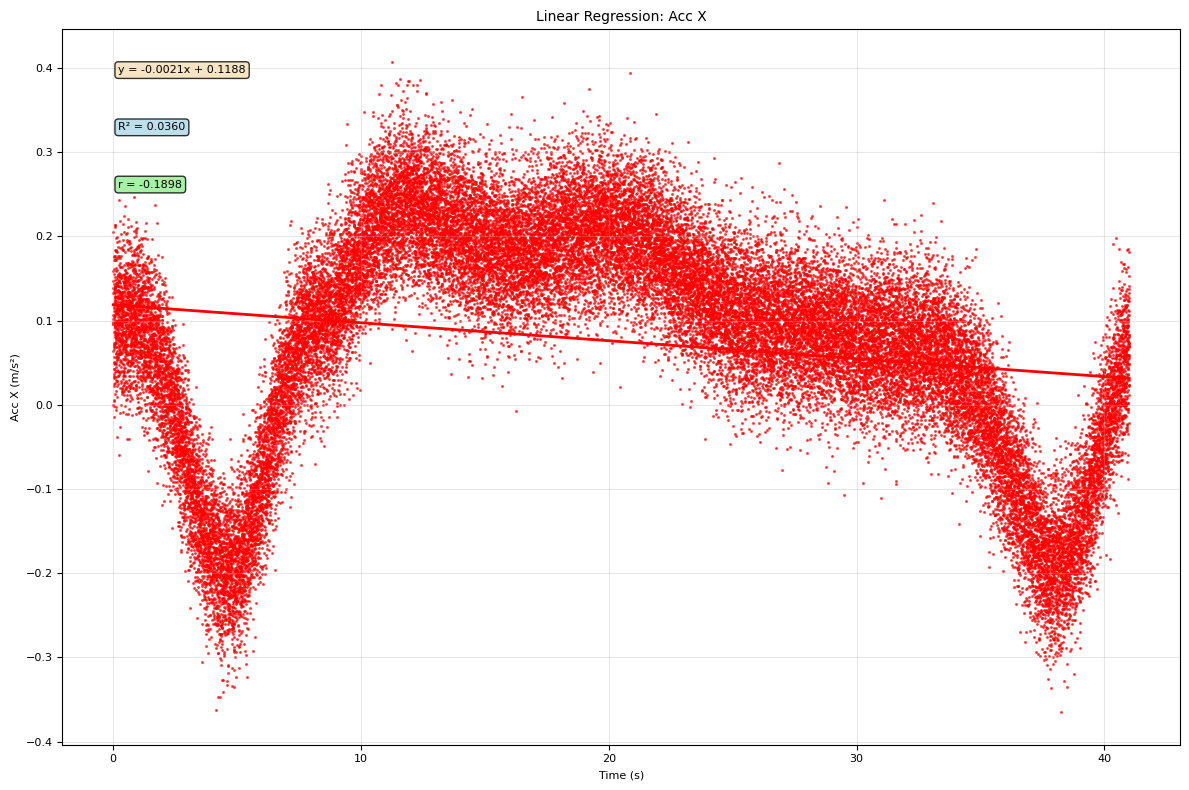

Plotting 2/25: acc_y


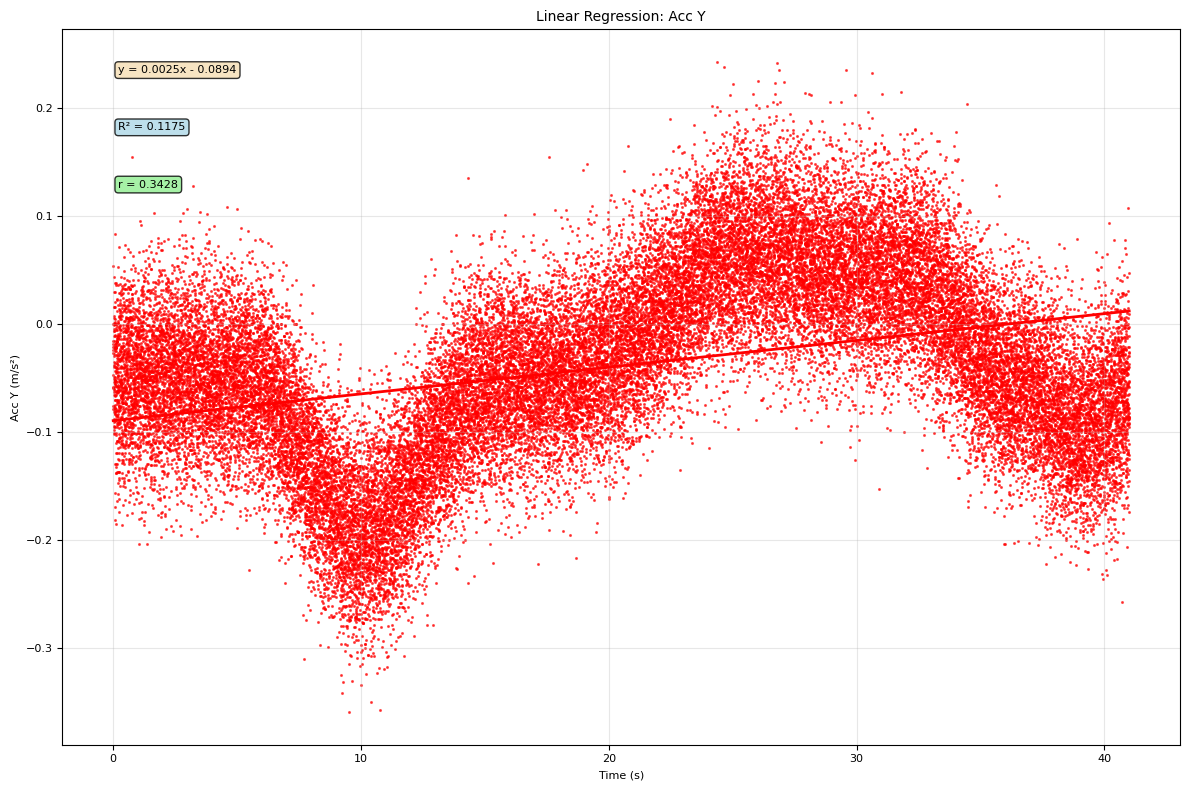

Plotting 3/25: acc_z


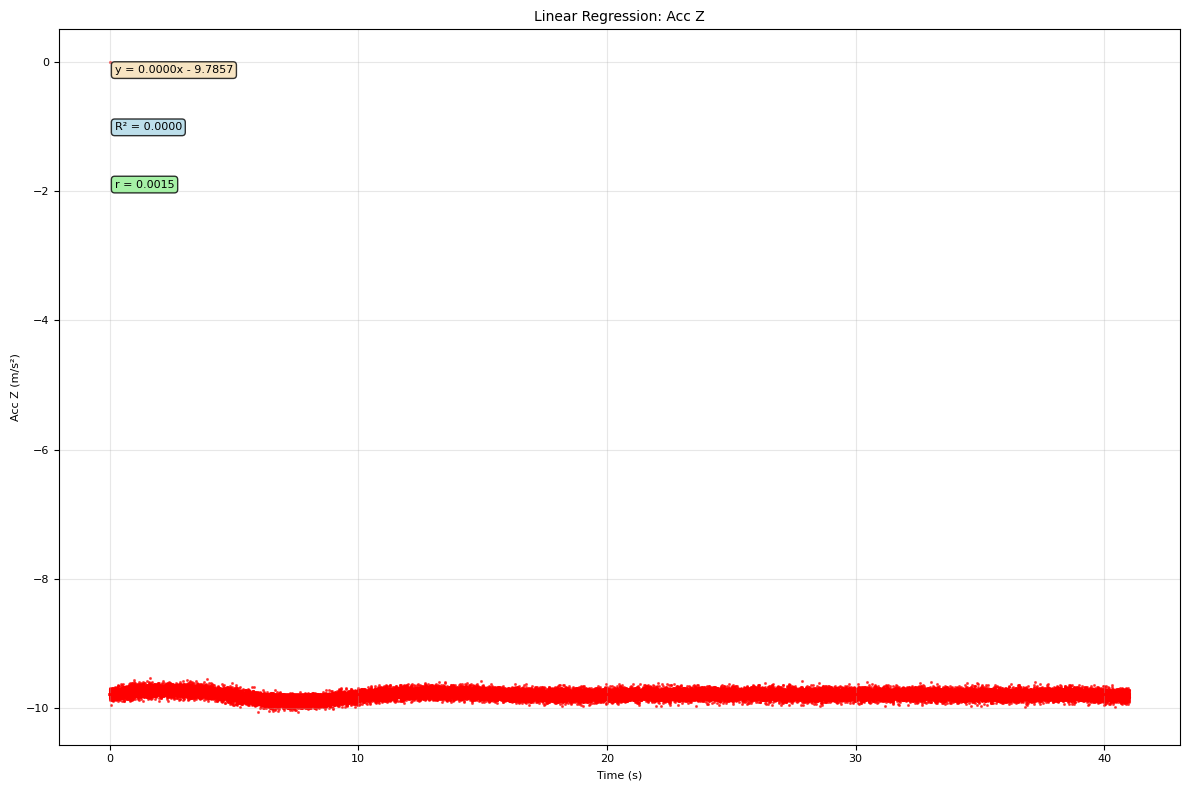

Plotting 4/25: gyro_x


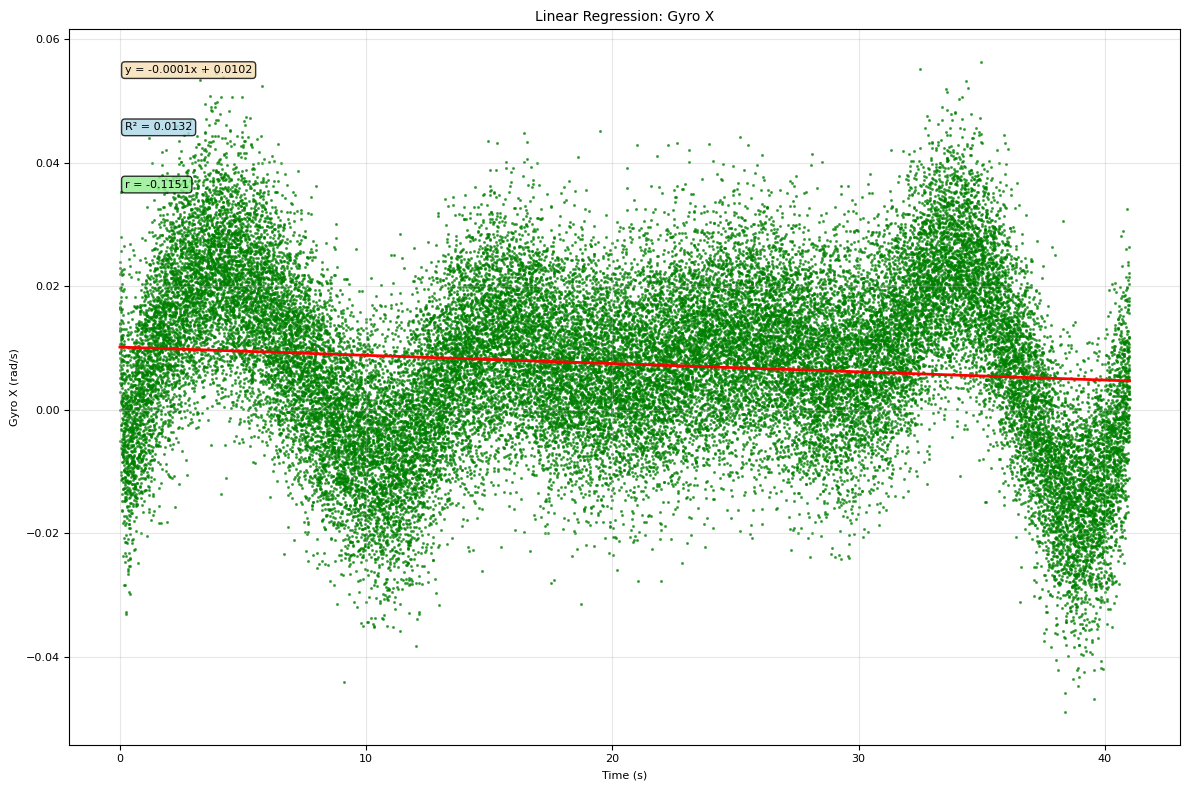

Plotting 5/25: gyro_y


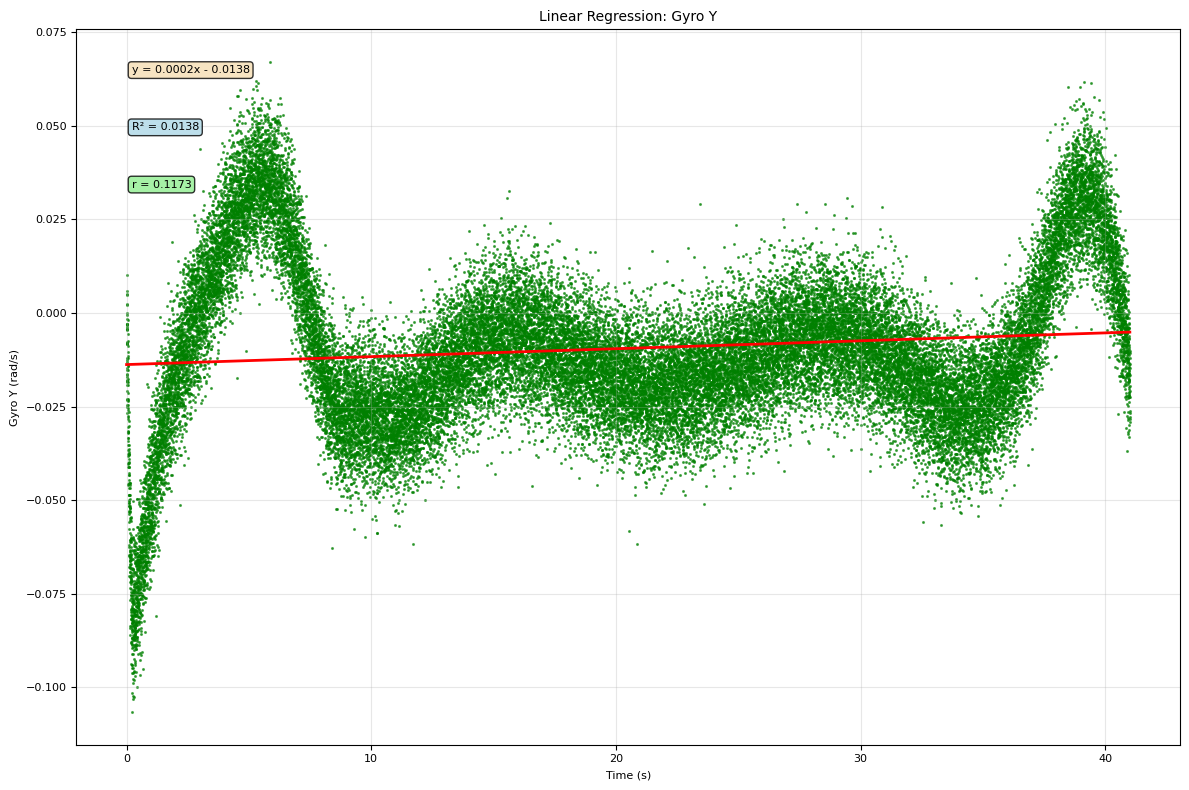

Plotting 6/25: gyro_z


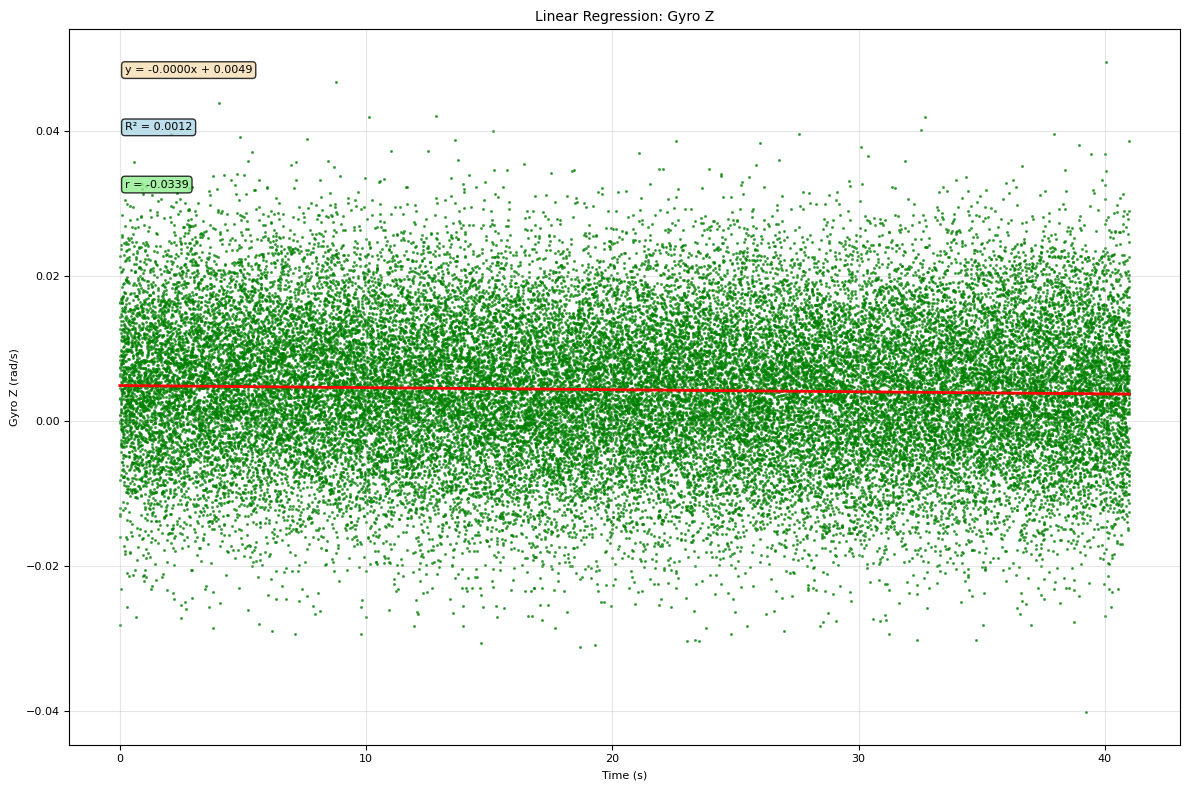

Plotting 7/25: gps_pos_x


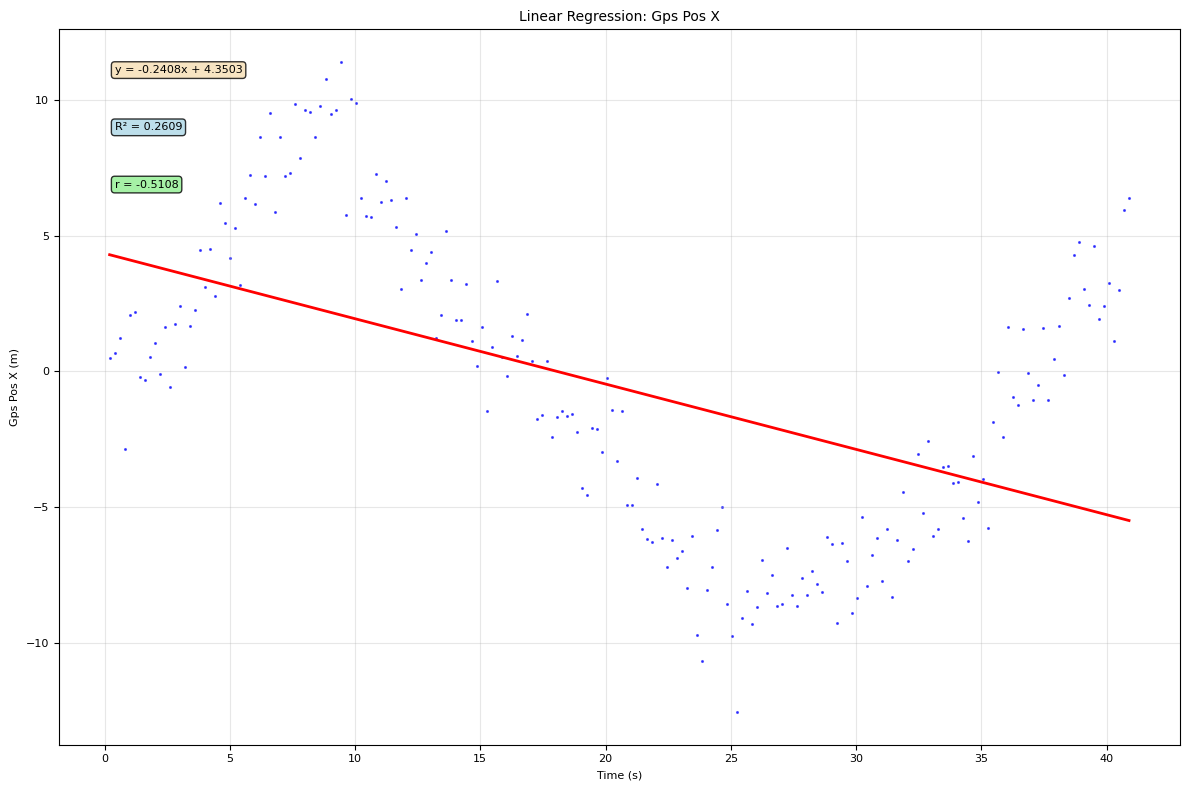

Plotting 8/25: gps_pos_y


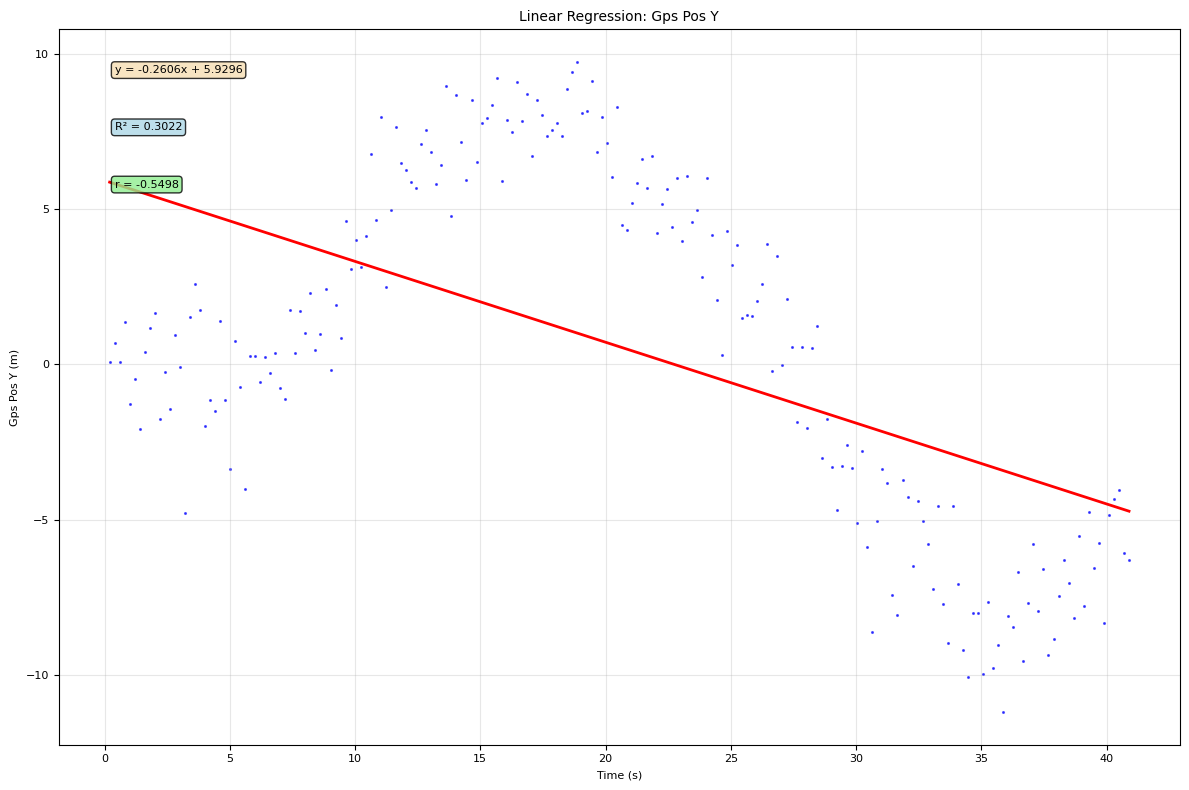

Plotting 9/25: gps_pos_z


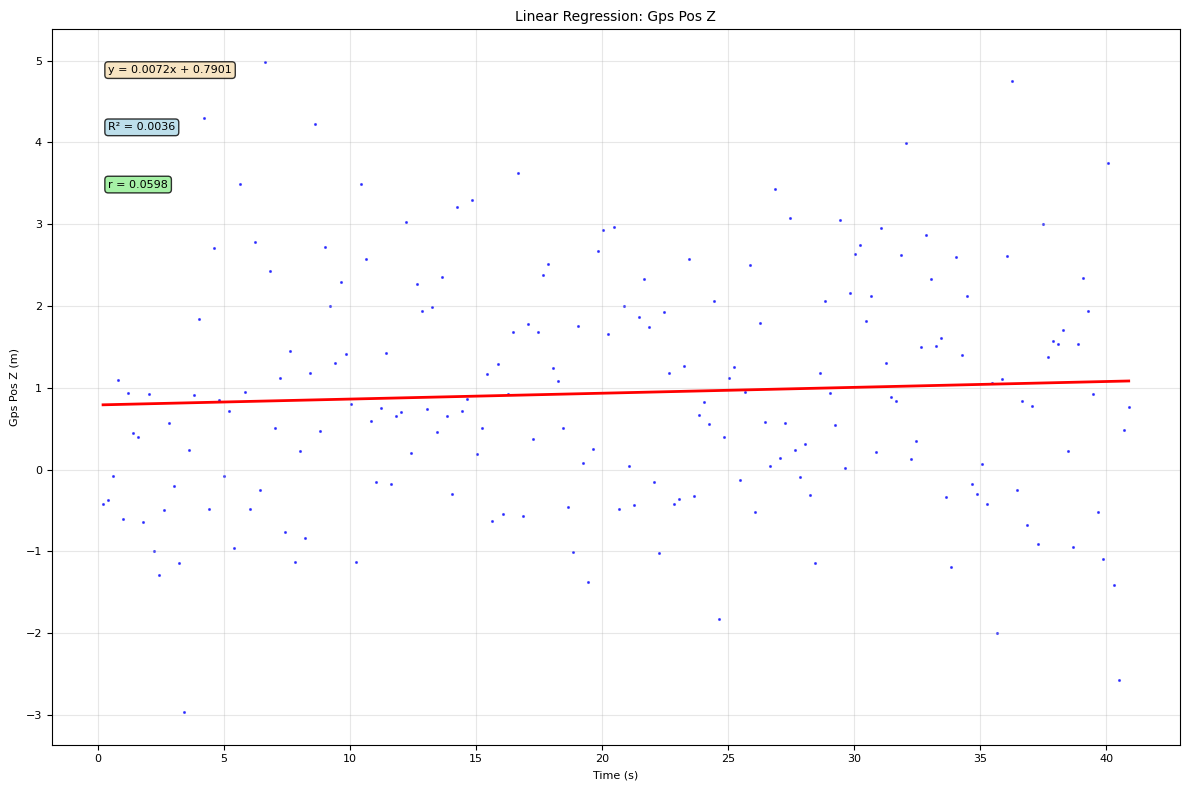

Plotting 10/25: gps_vel_x


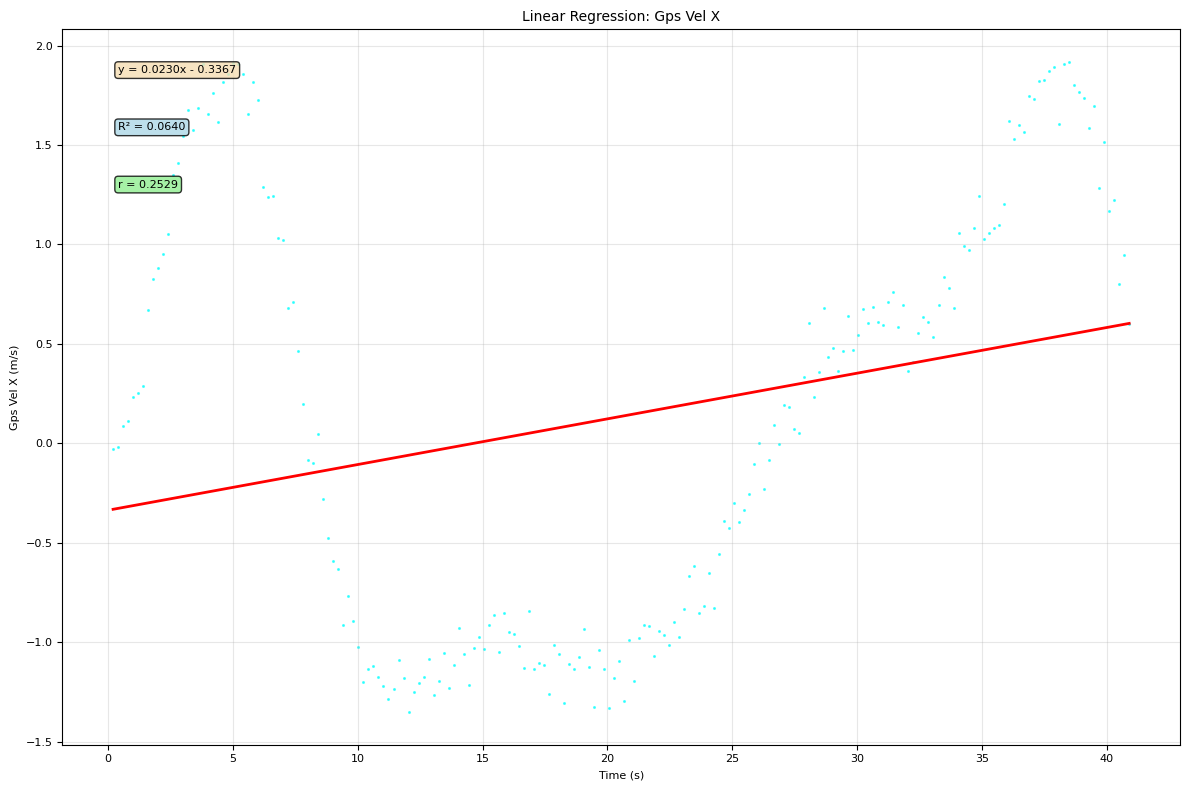

Plotting 11/25: gps_vel_y


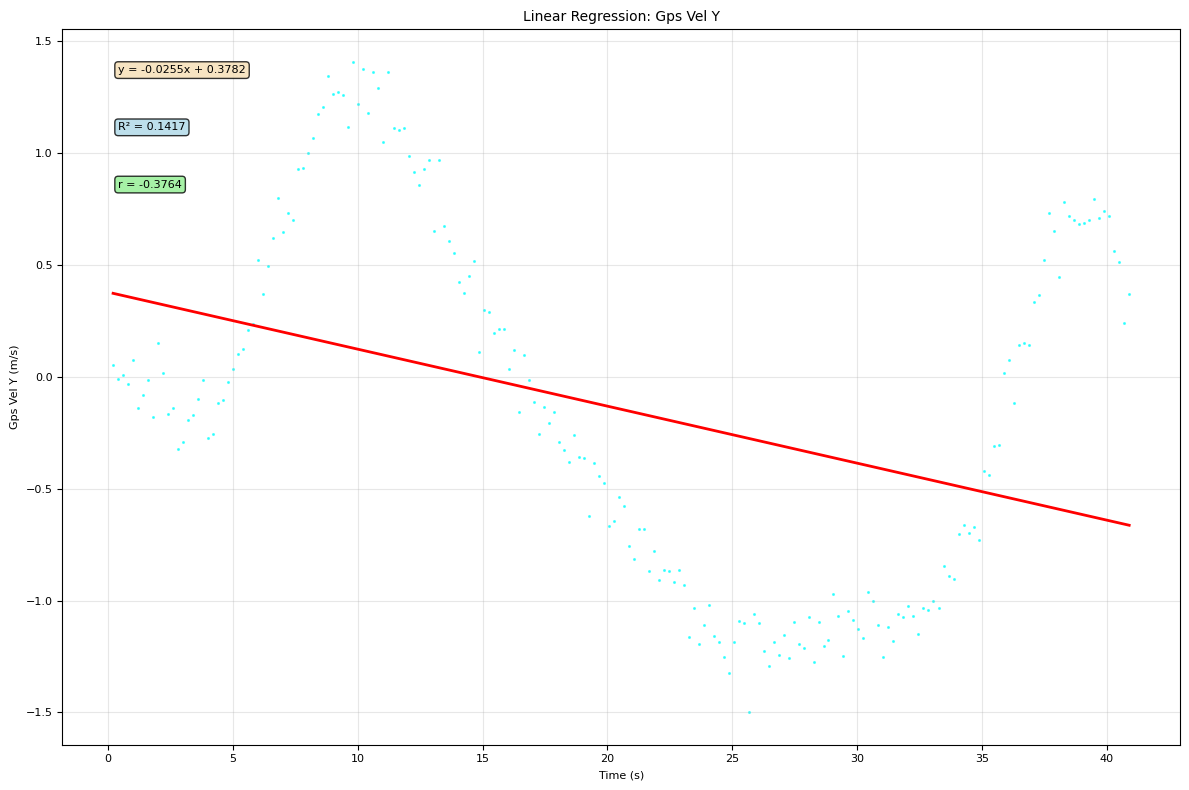

Plotting 12/25: gps_vel_z


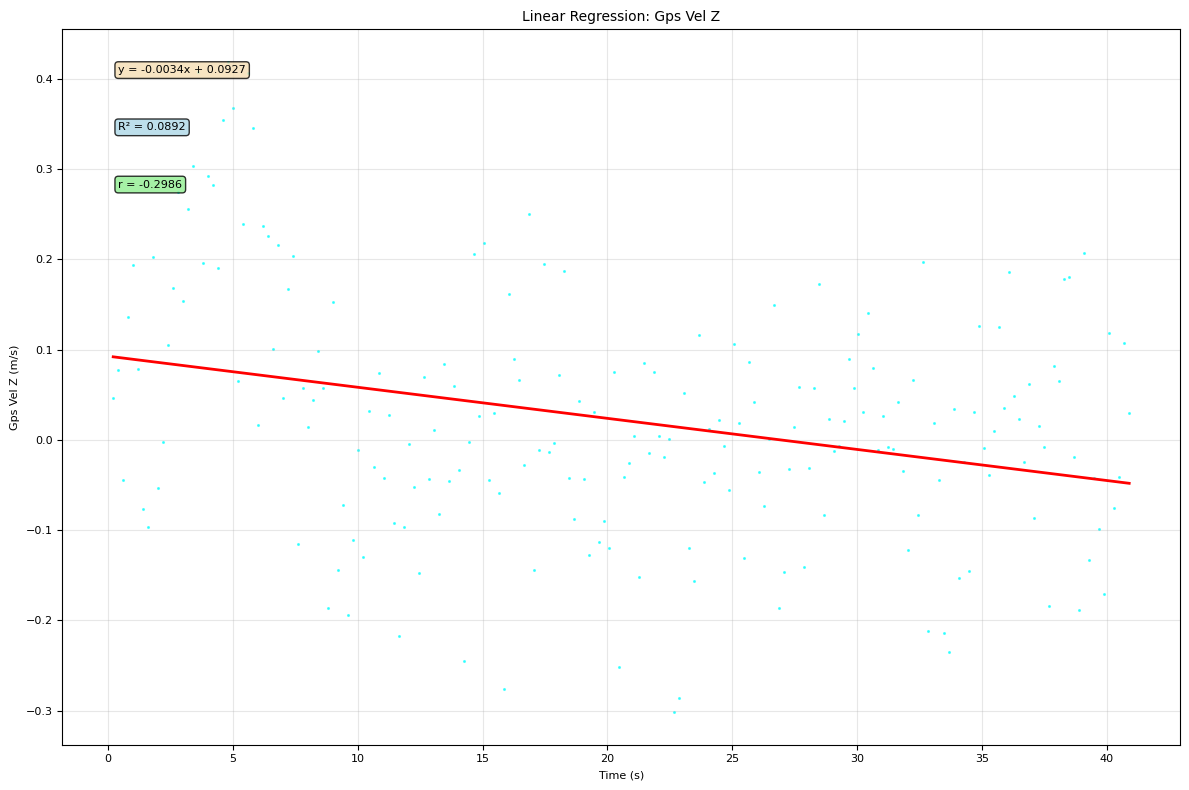

Plotting 13/25: baro_altitude


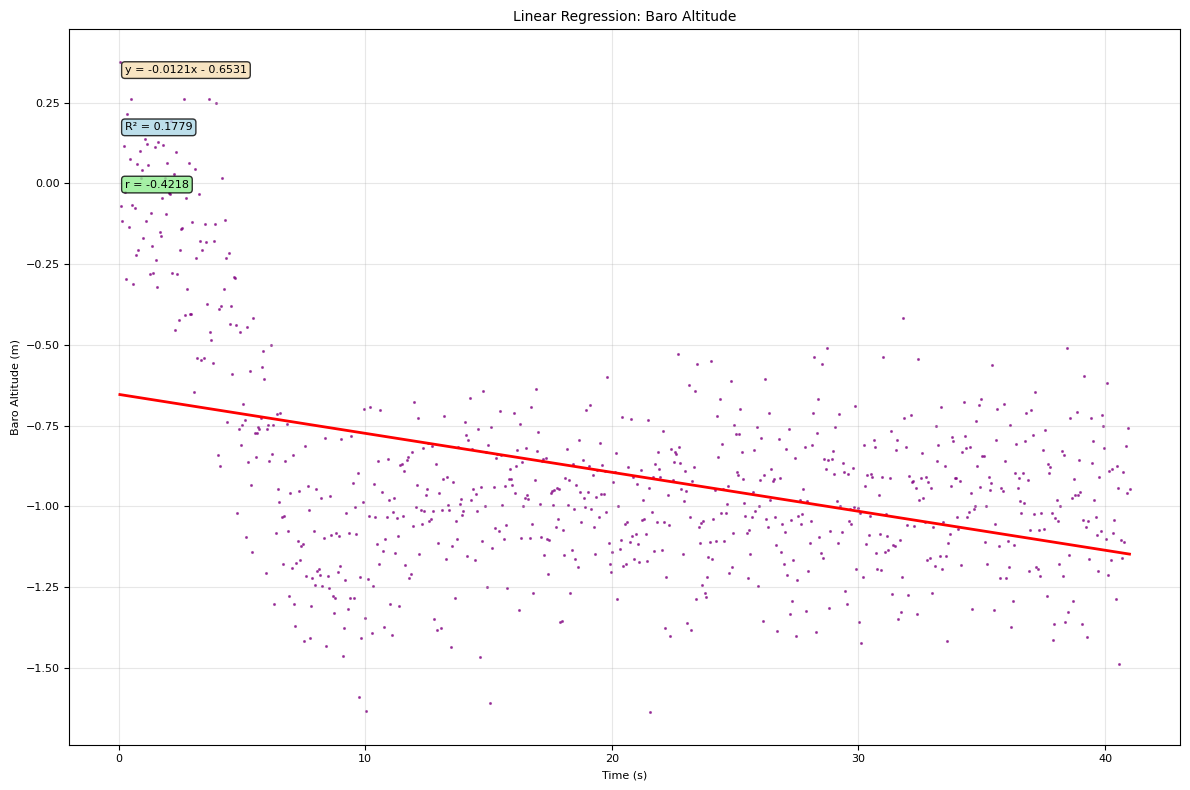

Plotting 14/25: mag_x


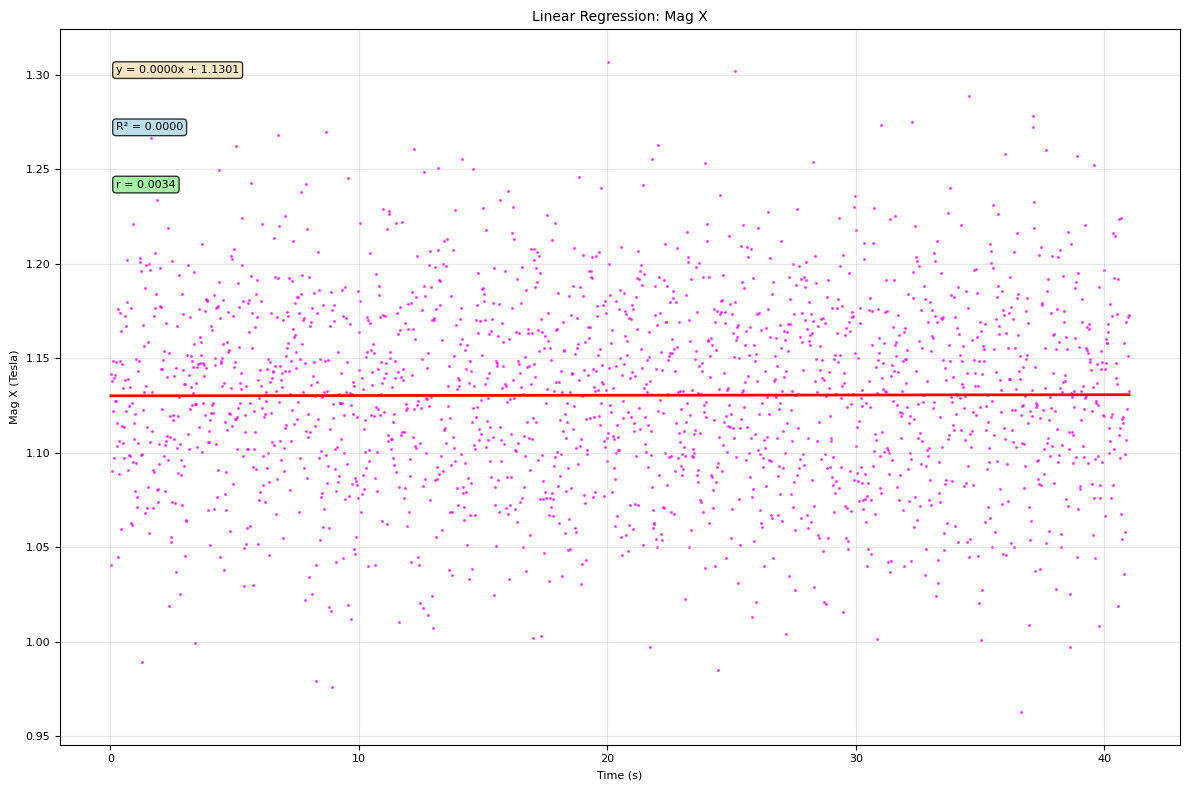

Plotting 15/25: mag_y


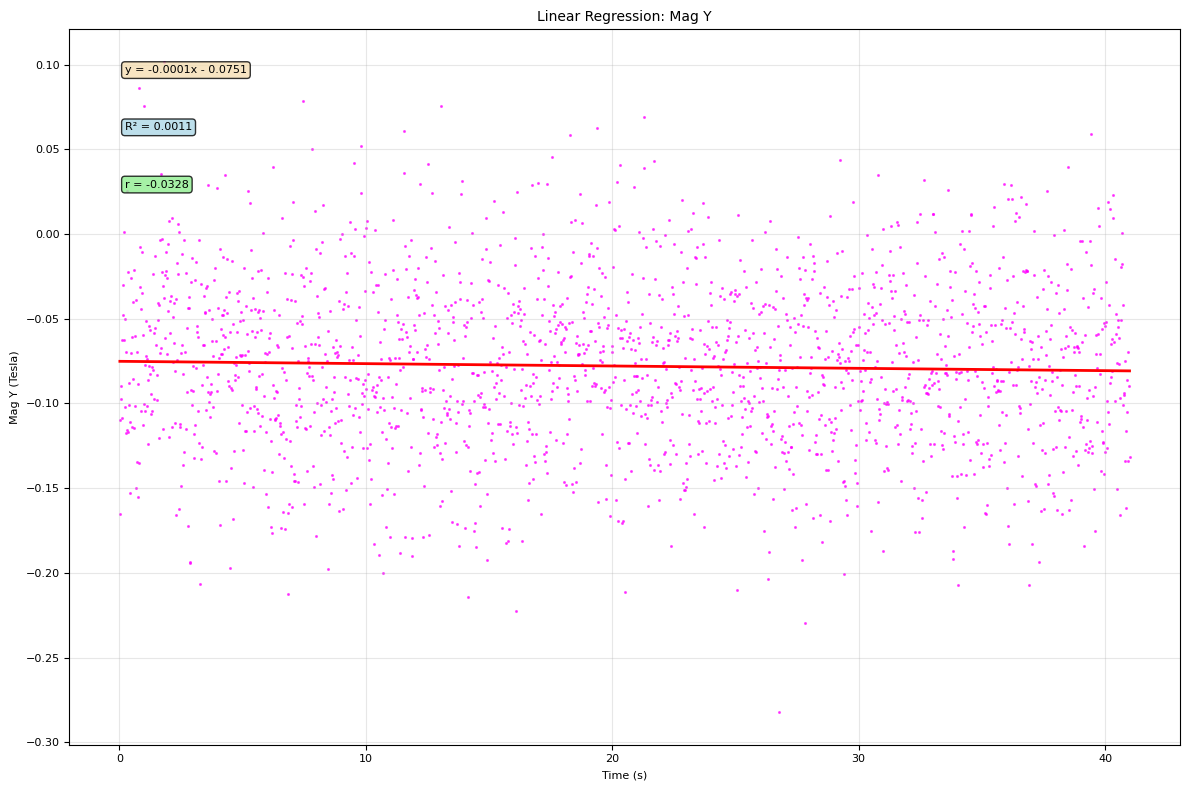

Plotting 16/25: mag_z


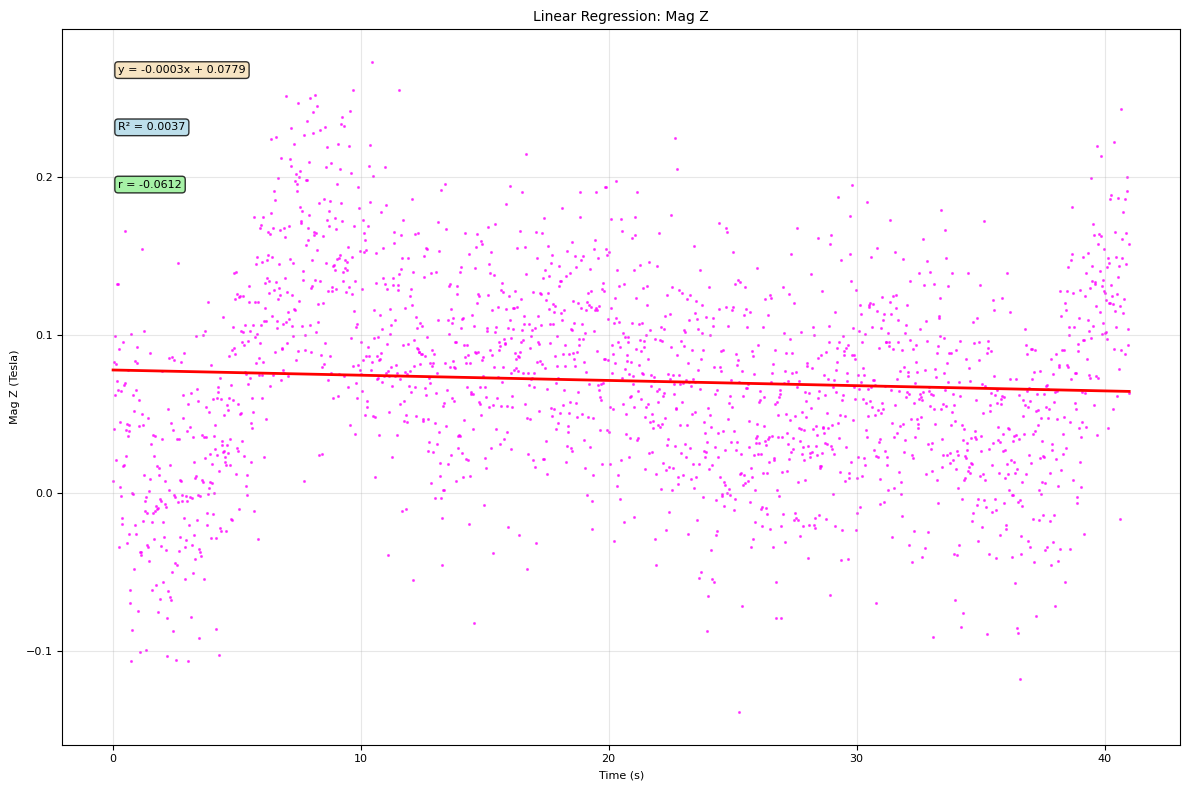

Plotting 17/25: true_pos_x


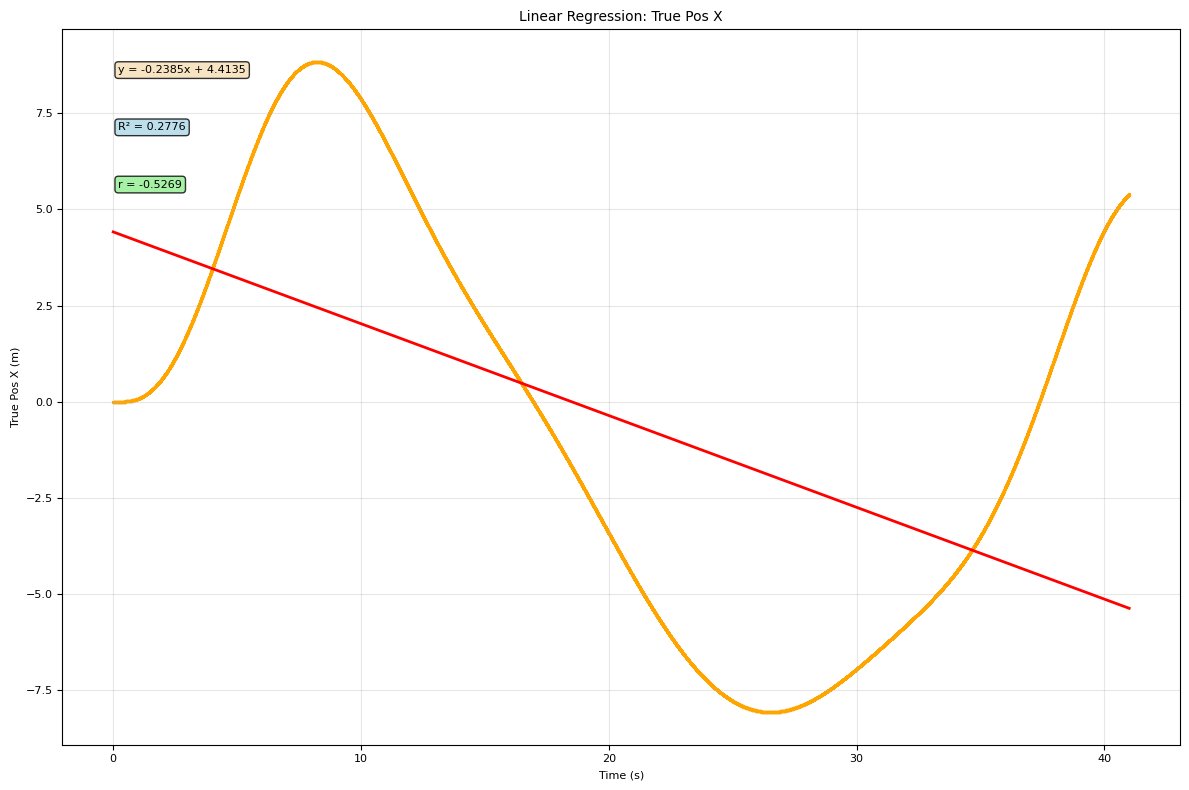

Plotting 18/25: true_pos_y


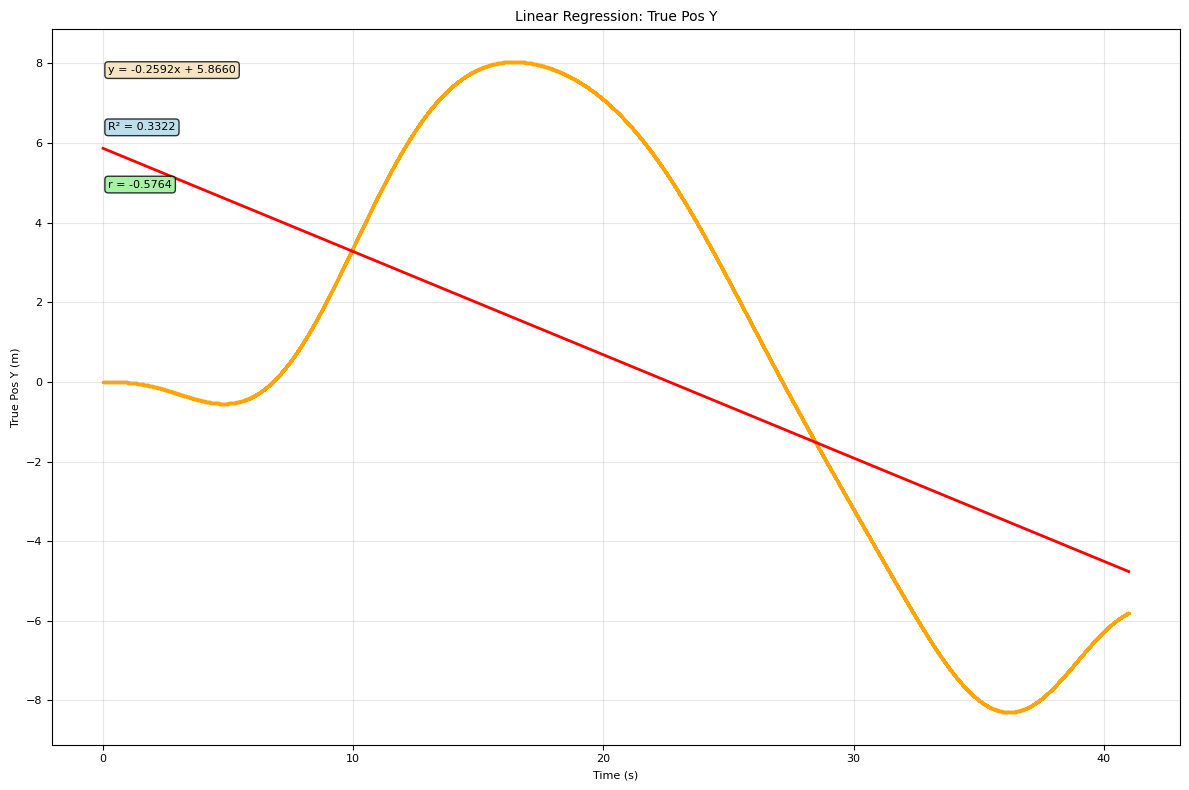

Plotting 19/25: true_pos_z


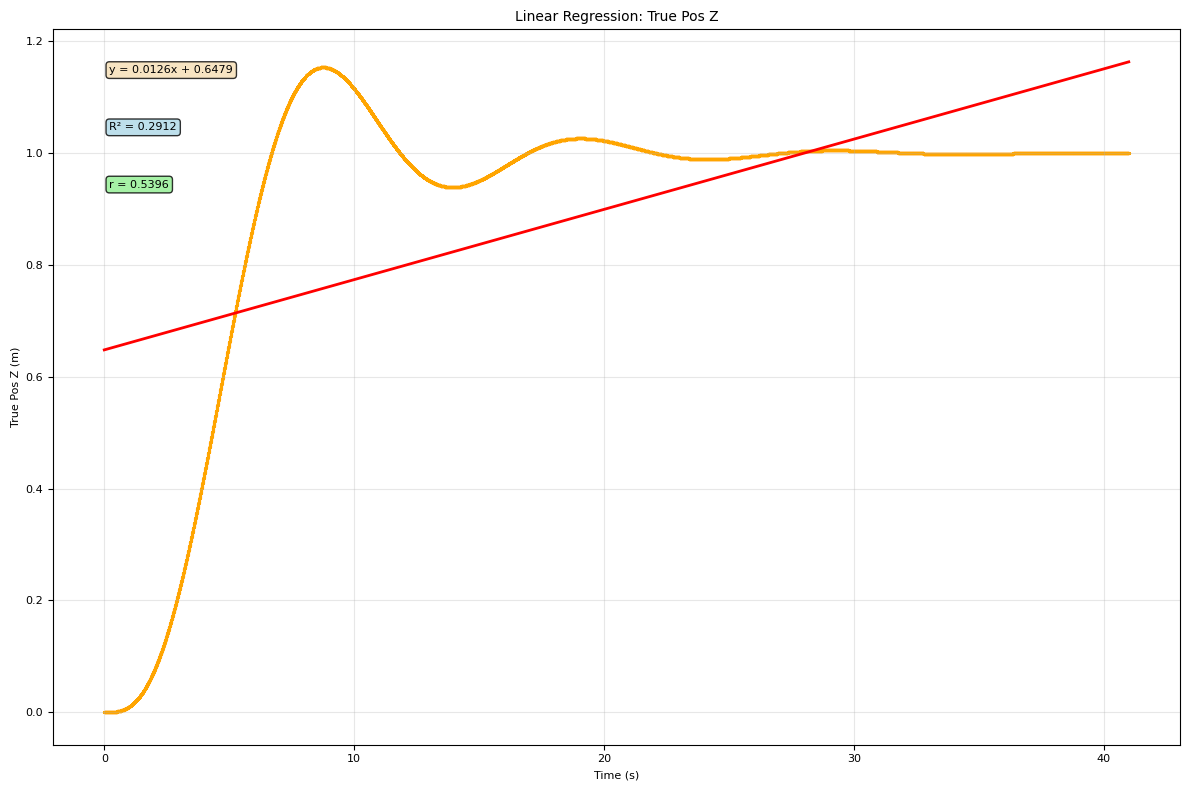

Plotting 20/25: true_vel_x


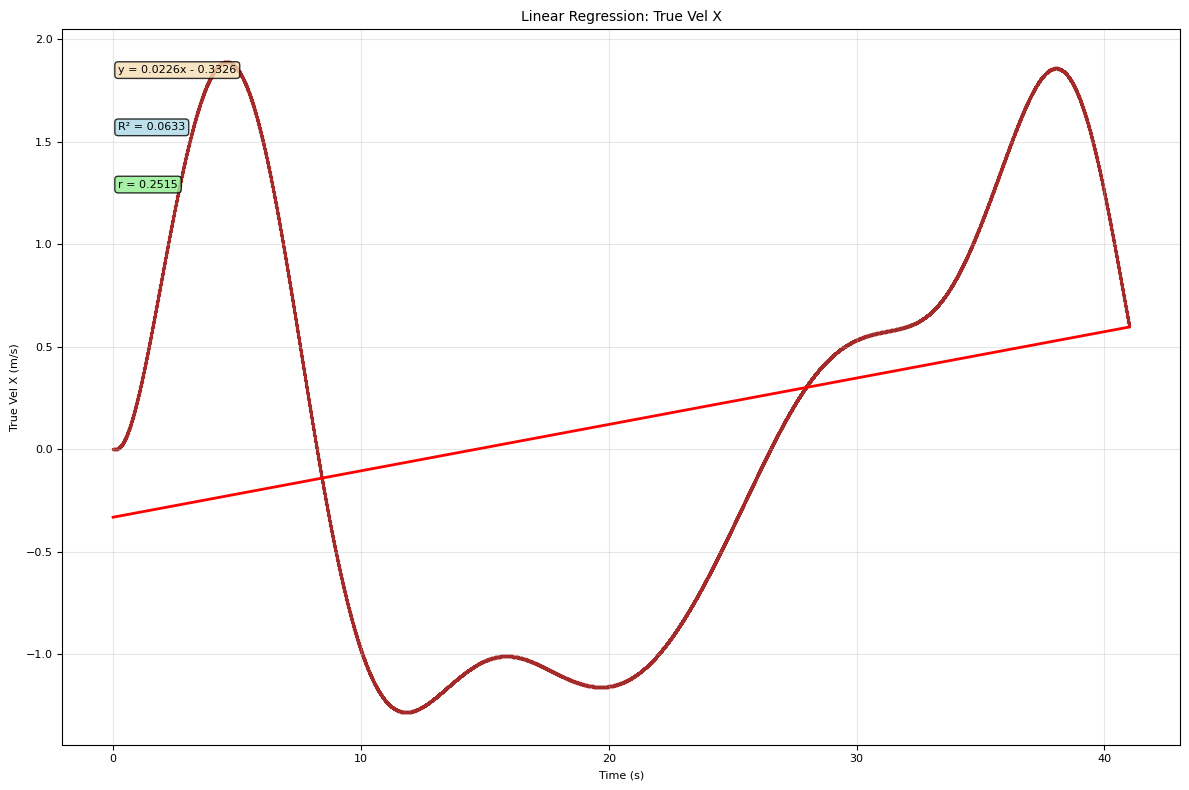

Plotting 21/25: true_vel_y


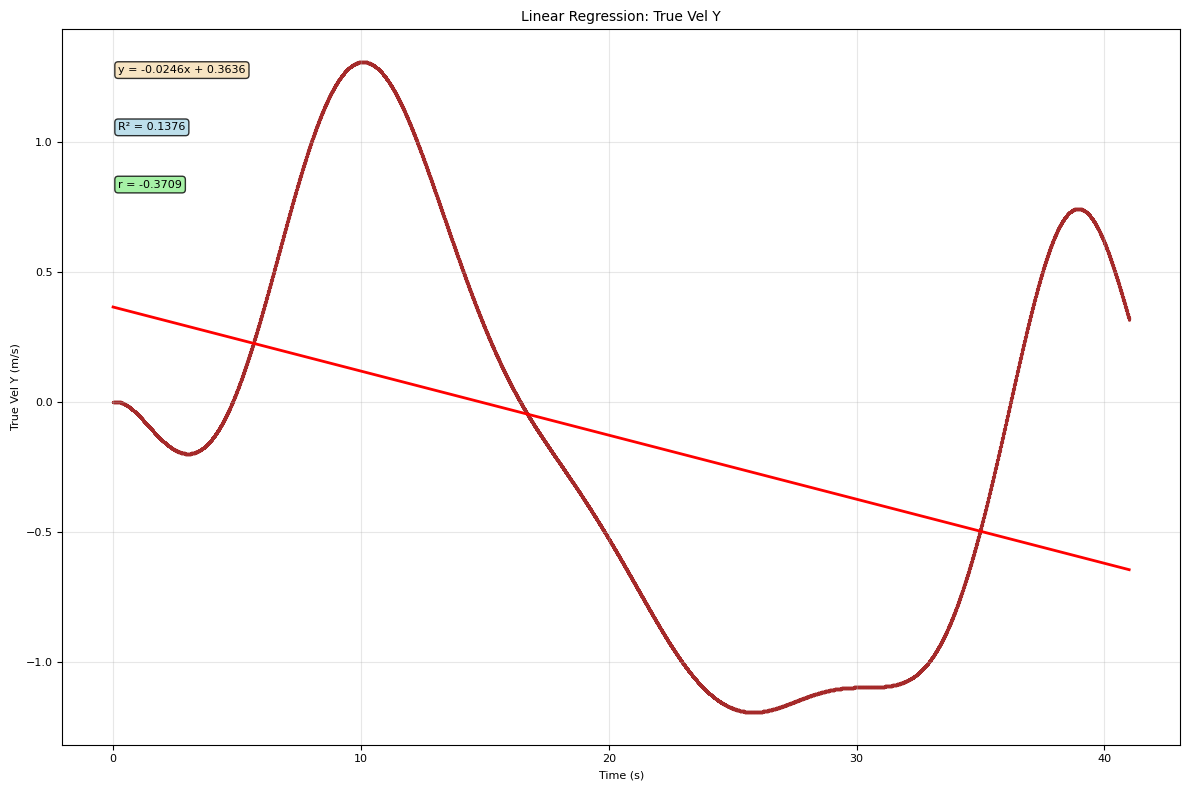

Plotting 22/25: true_vel_z


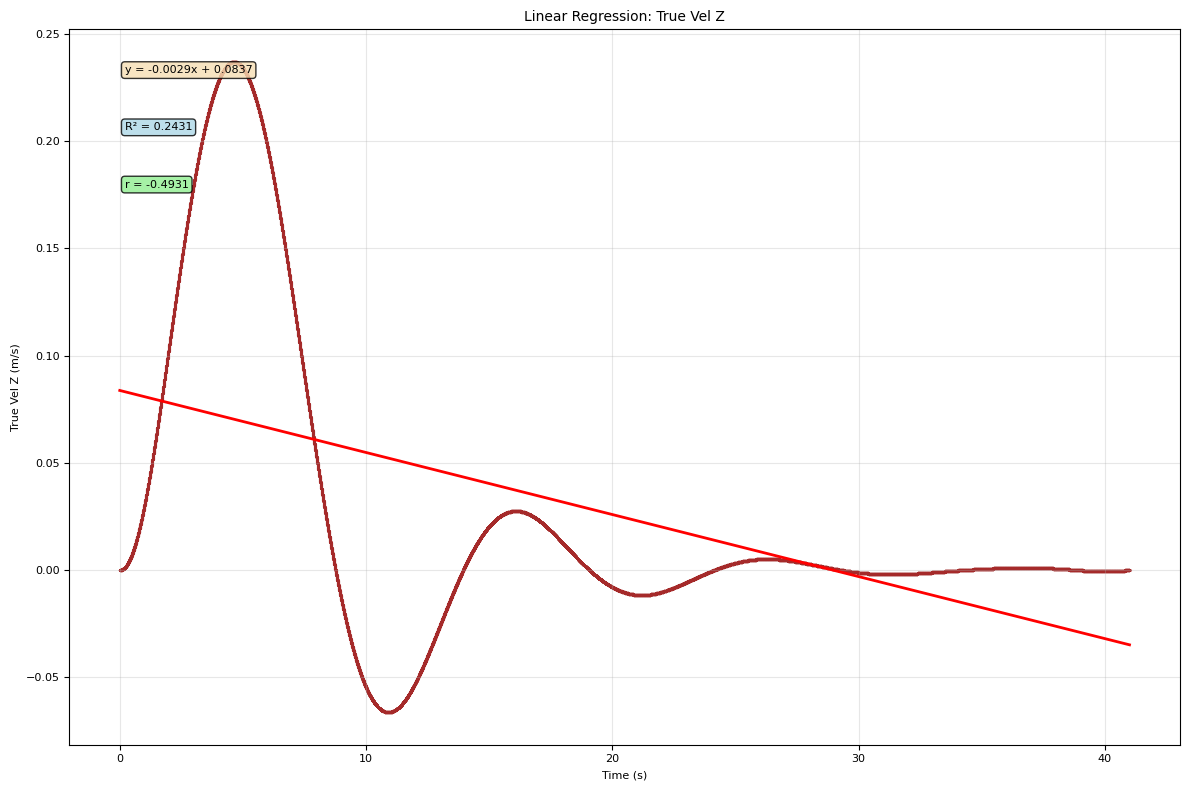

Plotting 23/25: true_roll


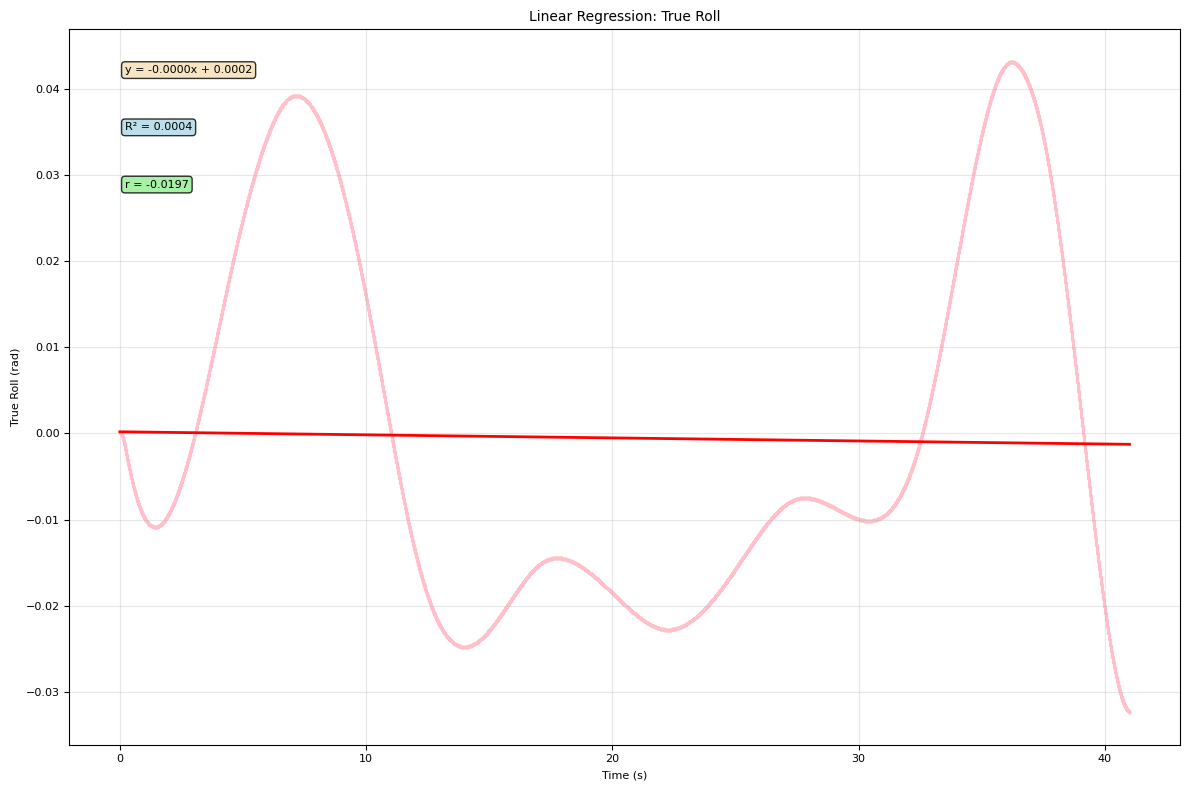

Plotting 24/25: true_pitch


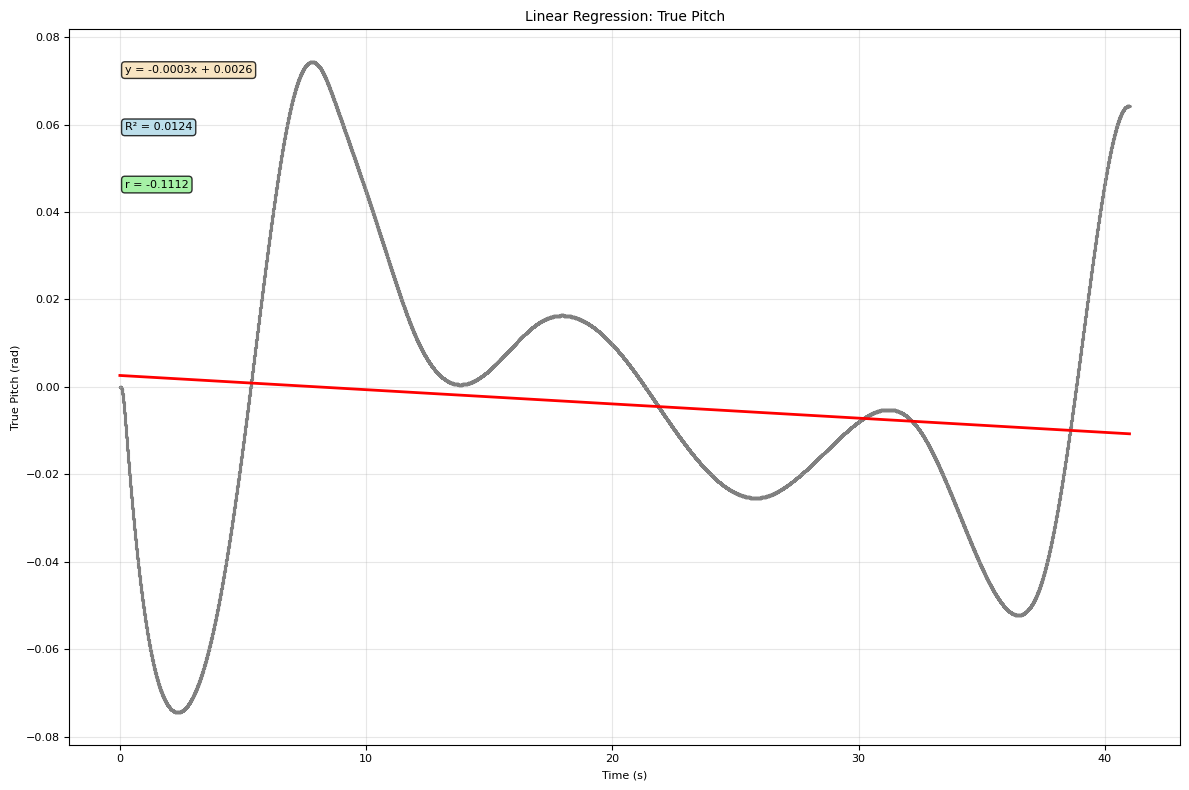

Plotting 25/25: true_yaw


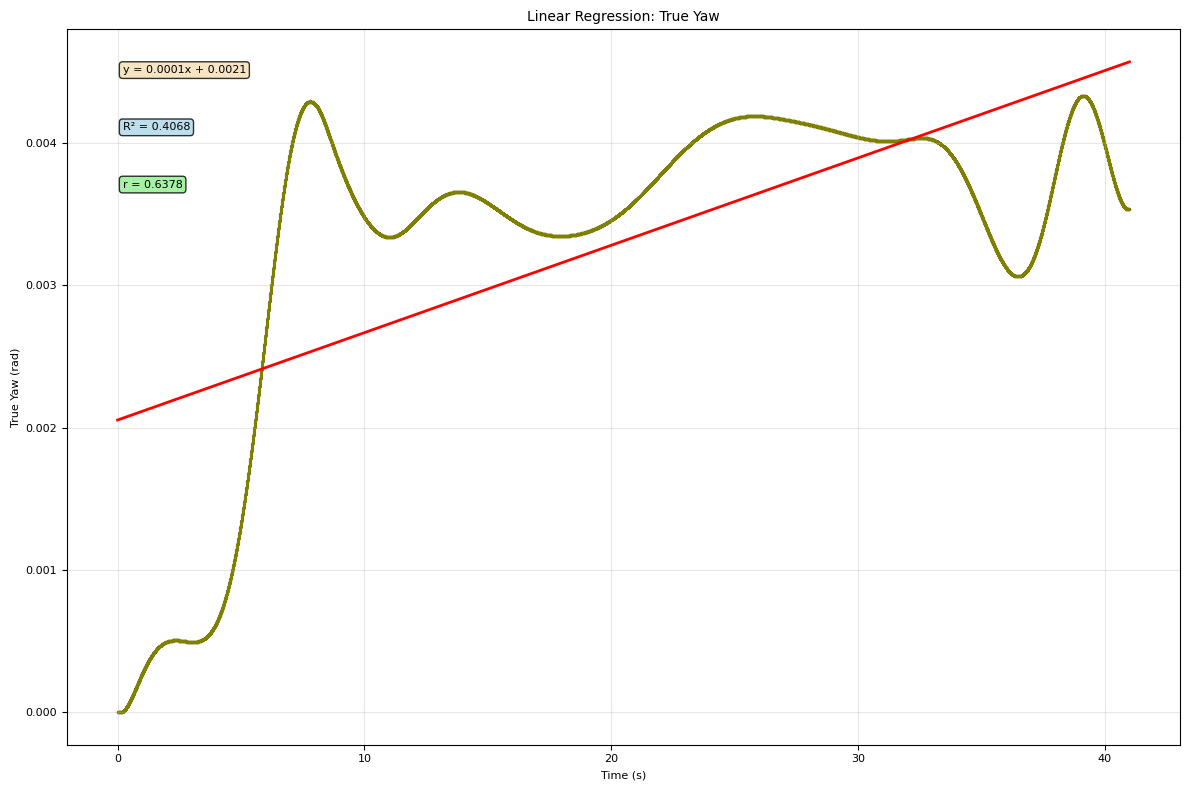


📊 Summary Statistics:
------------------------------------------------------------
acc_x          : Mean=  0.0751, Std=  0.1329, Min= -0.3651, Max=  0.4074
acc_y          : Mean= -0.0386, Std=  0.0856, Min= -0.3596, Max=  0.2431
acc_z          : Mean= -9.7855, Std=  0.0771, Min=-10.0590, Max=  0.0000
gyro_x         : Mean=  0.0074, Std=  0.0137, Min= -0.0489, Max=  0.0563
gyro_y         : Mean= -0.0094, Std=  0.0214, Min= -0.1066, Max=  0.0671
gyro_z         : Mean=  0.0043, Std=  0.0100, Min= -0.0402, Max=  0.0495
gps_pos_x      : Mean= -0.0030, Std=  0.3946, Min=-12.5642, Max= 11.4128
gps_pos_y      : Mean=  0.0029, Std=  0.3967, Min=-11.2100, Max=  9.7561
gps_pos_z      : Mean=  0.0047, Std=  0.1195, Min= -2.9661, Max=  4.9840
gps_vel_x      : Mean=  0.0007, Std=  0.0762, Min= -1.3525, Max=  1.9181
gps_vel_y      : Mean= -0.0007, Std=  0.0572, Min= -1.4989, Max=  1.4076
gps_vel_z      : Mean=  0.0001, Std=  0.0097, Min= -0.3016, Max=  0.4188
baro_altitude  : Mean= -0.0178, Std=  0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import glob


def find_csv_files(data_path):
    """Find all CSV files in the specified directory"""
    csv_files = glob.glob(os.path.join(data_path, "*.csv"))
    return csv_files


def display_available_files(csv_files):
    """Display available CSV files with index numbers"""
    print("\n📁 Available CSV Files:")
    print("-" * 50)
    for i, file in enumerate(csv_files):
        file_size = os.path.getsize(file) / 1024  # KB
        print(f"{i+1:2d}. {os.path.basename(file):30s} ({file_size:.1f} KB)")
    print("-" * 50)


def display_sensor_options():
    """Display available sensor data options"""
    sensor_groups = {
        'acc': ['acc_x', 'acc_y', 'acc_z'],
        'gyro': ['gyro_x', 'gyro_y', 'gyro_z'],
        'gps_pos': ['gps_pos_x', 'gps_pos_y', 'gps_pos_z'],
        'gps_vel': ['gps_vel_x', 'gps_vel_y', 'gps_vel_z'],
        'mag': ['mag_x', 'mag_y', 'mag_z'],
        'baro': ['baro_altitude'],
        'true_pos': ['true_pos_x', 'true_pos_y', 'true_pos_z'],
        'true_vel': ['true_vel_x', 'true_vel_y', 'true_vel_z'],
        'true_att': ['true_roll', 'true_pitch', 'true_yaw']
    }

    print("\n📊 Available Sensor Groups:")
    print("-" * 60)
    for key, sensors in sensor_groups.items():
        sensor_list = ', '.join(sensors)
        print(f"{key:10s}: {sensor_list}")
    print("-" * 60)
    print("\n💡 Input Options:")
    print("• Group names: acc, gyro, gps_pos, gps_vel, mag, baro, true_pos, true_vel, true_att")
    print("• Individual sensors: acc_x, gyro_z, true_pos_x, etc.")
    print("• Multiple selections: separate with commas (e.g., 'acc, gyro, true_pos')")
    print("• All sensors: type 'all'")

    return sensor_groups


def parse_sensor_input(input_str, sensor_groups, available_columns):
    """Parse user input and return list of sensor columns to plot"""
    input_str = input_str.lower().strip()
    selected_sensors = []

    if input_str == 'all':
        # Return all available sensor columns (excluding timestamp and availability flags)
        exclude_cols = ['timestamp', 'gps_available',
                        'baro_available', 'mag_available']
        selected_sensors = [
            col for col in available_columns if col not in exclude_cols]
    else:
        # Parse comma-separated input
        inputs = [item.strip() for item in input_str.split(',')]

        for item in inputs:
            if item in sensor_groups:
                # It's a group name
                group_sensors = [s for s in sensor_groups[item]
                                 if s in available_columns]
                selected_sensors.extend(group_sensors)
            elif item in available_columns:
                # It's an individual sensor
                selected_sensors.append(item)
            else:
                print(f"⚠️  Warning: '{item}' not found in available data")

    # Remove duplicates while preserving order
    selected_sensors = list(dict.fromkeys(selected_sensors))
    return selected_sensors


def plot_regression(x, y, ax, title, xlabel, ylabel, color='blue'):
    """Create regression plot for given data"""
    # Remove NaN values
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]

    if len(x_clean) < 2:
        ax.text(0.5, 0.5, 'Insufficient data\n(<2 points)',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
        ax.set_title(title, fontsize=10)
        ax.set_xlabel(xlabel, fontsize=8)
        ax.set_ylabel(ylabel, fontsize=8)
        return

    # Reshape for sklearn
    X = x_clean.reshape(-1, 1)

    # Fit linear regression
    reg = LinearRegression()
    reg.fit(X, y_clean)
    y_pred = reg.predict(X)

    # Calculate statistics
    r2 = r2_score(y_clean, y_pred)
    correlation = np.corrcoef(x_clean, y_clean)[0, 1]
    slope = reg.coef_[0]
    intercept = reg.intercept_

    # Plot data points
    ax.scatter(x_clean, y_clean, alpha=0.6, color=color, s=1.5)

    # Plot regression line
    ax.plot(x_clean, y_pred, color='red', linewidth=2)

    # Add statistics text
    if intercept >= 0:
        equation = f'y = {slope:.4f}x + {intercept:.4f}'
    else:
        equation = f'y = {slope:.4f}x - {abs(intercept):.4f}'

    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.text(0.05, 0.87, f'R² = {r2:.4f}', transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    ax.text(0.05, 0.79, f'r = {correlation:.4f}', transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)


def get_sensor_unit(column_name):
    """Get appropriate unit for each sensor type"""
    units = {
        'acc_': 'm/s²', 'gyro_': 'rad/s', 'gps_pos_': 'm', 'gps_vel_': 'm/s',
        'mag_': 'Tesla', 'baro_altitude': 'm', 'true_pos_': 'm', 'true_vel_': 'm/s',
        'true_roll': 'rad', 'true_pitch': 'rad', 'true_yaw': 'rad'
    }

    for key, unit in units.items():
        if key in column_name:
            return unit
    return ''


def get_sensor_color(column_name):
    """Get color based on sensor type"""
    colors = {
        'acc': 'red', 'gyro': 'green', 'gps_pos': 'blue', 'gps_vel': 'cyan',
        'mag': 'magenta', 'baro': 'purple', 'true_pos': 'orange',
        'true_vel': 'brown', 'true_roll': 'pink', 'true_pitch': 'gray', 'true_yaw': 'olive'
    }

    for sensor_type, color in colors.items():
        if sensor_type in column_name:
            return color
    return 'blue'


def main():
    """Main function to run the quadcopter data analysis"""
    print("="*80)
    print("🚁 QUADCOPTER SENSOR DATA LINEAR REGRESSION ANALYSIS")
    print("="*80)

    # Set default data path
    default_path = r"D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs"

    print(f"\n📂 Default data path: {default_path}")
    custom_path = input(
        "Enter custom path (or press Enter to use default): ").strip()

    data_path = custom_path if custom_path else default_path

    # Find CSV files
    csv_files = find_csv_files(data_path)

    if not csv_files:
        print(f"❌ No CSV files found in: {data_path}")
        return

    # Display available files
    display_available_files(csv_files)

    # File selection
    while True:
        try:
            file_choice = input(
                f"\nSelect file number (1-{len(csv_files)}): ").strip()
            file_index = int(file_choice) - 1
            if 0 <= file_index < len(csv_files):
                selected_file = csv_files[file_index]
                break
            else:
                print(
                    f"❌ Please enter a number between 1 and {len(csv_files)}")
        except ValueError:
            print("❌ Please enter a valid number")

    # Load data
    print(f"\n📖 Loading data from: {os.path.basename(selected_file)}")
    try:
        df = pd.read_csv(selected_file)
        print(f"✅ Data loaded successfully!")
        print(f"   Shape: {df.shape}")
        print(
            f"   Time range: {df['timestamp'].min():.2f} - {df['timestamp'].max():.2f} seconds")
        print(
            f"   Duration: {df['timestamp'].max() - df['timestamp'].min():.2f} seconds")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return

    # Display data summary
    print(f"\n📋 Data Summary:")
    print(f"   Total samples: {len(df):,}")

    # Check availability flags
    availability_flags = ['gps_available', 'baro_available', 'mag_available']
    for flag in availability_flags:
        if flag in df.columns:
            availability = df[flag].sum()
            percentage = (availability / len(df)) * 100
            sensor_name = flag.replace('_available', '').upper()
            print(
                f"   {sensor_name} availability: {availability:,}/{len(df):,} ({percentage:.1f}%)")

    # Display sensor options
    sensor_groups = display_sensor_options()

    # Sensor selection
    print(f"\n📊 Available columns in data: {list(df.columns)}")
    sensor_input = input("\nEnter sensors to plot: ").strip()

    if not sensor_input:
        print("❌ No sensors selected")
        return

    # Parse sensor selection
    selected_sensors = parse_sensor_input(
        sensor_input, sensor_groups, df.columns)

    if not selected_sensors:
        print("❌ No valid sensors found")
        return

    print(
        f"\n✅ Selected sensors ({len(selected_sensors)}): {selected_sensors}")

    # Ask for plot layout
    print(f"\n🎨 Plot Layout Options:")
    print("1. Subplots (all in one figure)")
    print("2. Separate figures")

    layout_choice = input("Choose layout (1 or 2, default=1): ").strip()
    separate_plots = layout_choice == '2'

    # Plot the selected sensors
    print(f"\n📈 Generating plots...")

    if separate_plots:
        # Create separate figures for each sensor
        for i, sensor in enumerate(selected_sensors):
            print(f"Plotting {i+1}/{len(selected_sensors)}: {sensor}")

            fig, ax = plt.subplots(1, 1, figsize=(12, 8))

            # Handle sensor availability
            if 'gps' in sensor and 'gps_available' in df.columns:
                mask = df['gps_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'mag' in sensor and 'mag_available' in df.columns:
                mask = df['mag_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'baro' in sensor and 'baro_available' in df.columns:
                mask = df['baro_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            else:
                x_data = df['timestamp']
                y_data = df[sensor]

            color = get_sensor_color(sensor)
            unit = get_sensor_unit(sensor)
            ylabel = f"{sensor.replace('_', ' ').title()} ({unit})" if unit else sensor.replace(
                '_', ' ').title()

            plot_regression(x_data.values, y_data.values, ax,
                            f'Linear Regression: {sensor.replace("_", " ").title()}',
                            'Time (s)', ylabel, color)

            plt.tight_layout()
            plt.show()

    else:
        # Create subplots
        n_sensors = len(selected_sensors)
        n_cols = min(3, n_sensors)
        n_rows = (n_sensors + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        fig.suptitle('Quadcopter Sensor Data - Linear Regression Analysis',
                     fontsize=16, fontweight='bold')

        # Handle single plot case
        if n_sensors == 1:
            axes = [axes]
        elif n_rows == 1 or n_cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()

        for i, sensor in enumerate(selected_sensors):
            # Handle sensor availability
            if 'gps' in sensor and 'gps_available' in df.columns:
                mask = df['gps_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'mag' in sensor and 'mag_available' in df.columns:
                mask = df['mag_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            elif 'baro' in sensor and 'baro_available' in df.columns:
                mask = df['baro_available'] == True
                x_data = df.loc[mask, 'timestamp']
                y_data = df.loc[mask, sensor]
            else:
                x_data = df['timestamp']
                y_data = df[sensor]

            color = get_sensor_color(sensor)
            unit = get_sensor_unit(sensor)
            ylabel = f"{sensor.split('_')[-1].upper()} ({unit})" if unit else sensor.split(
                '_')[-1].upper()

            plot_regression(x_data.values, y_data.values, axes[i],
                            sensor.replace('_', ' ').title(), 'Time (s)', ylabel, color)

        # Remove unused subplots
        for i in range(n_sensors, len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    # Print summary statistics
    print(f"\n📊 Summary Statistics:")
    print("-" * 60)
    for sensor in selected_sensors:
        data = df[sensor].dropna()
        if len(data) > 0:
            print(f"{sensor:15s}: Mean={data.mean():8.4f}, Std={data.std():8.4f}, "
                  f"Min={data.min():8.4f}, Max={data.max():8.4f}")

    print(
        f"\n✅ Analysis complete! Generated plots for {len(selected_sensors)} sensors.")


# Run the main function
if __name__ == "__main__":
    main()

🚁 HEXACOPTER SENSOR DATA VISUALIZATION AND COMPARISON

📂 Default data path: D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs

📁 Available CSV Files:
--------------------------------------------------
 1. all_sensor_data_20250519_174550.csv (4178.0 KB)
 2. all_sensor_data_20250523_032200.csv (7144.9 KB)
 3. all_sensor_data_20250523_040556.csv (7188.5 KB)
 4. all_sensor_data_20250523_041548.csv (7124.1 KB)
 5. all_sensor_data_20250523_041941.csv (17913.3 KB)
 6. all_sensor_data_20250526_123717.csv (14631.1 KB)
 7. all_sensor_data_20250526_170501.csv (16288.7 KB)
 8. all_sensor_data_20250527_072440.csv (15449.9 KB)
 9. baro_data_20250519_174550.csv  (581.7 KB)
10. complete_flight_data_20250529_194810.csv (57039.3 KB)
11. complete_flight_data_with_geodetic_20250529_232221.csv (57533.1 KB)
12. complete_flight_data_with_geodetic_20250529_232459.csv (57525.6 KB)
13. complete_flight_data_with_geodetic_20250530_010505.csv (33453.6 KB)
14. complete_flight_data_wit

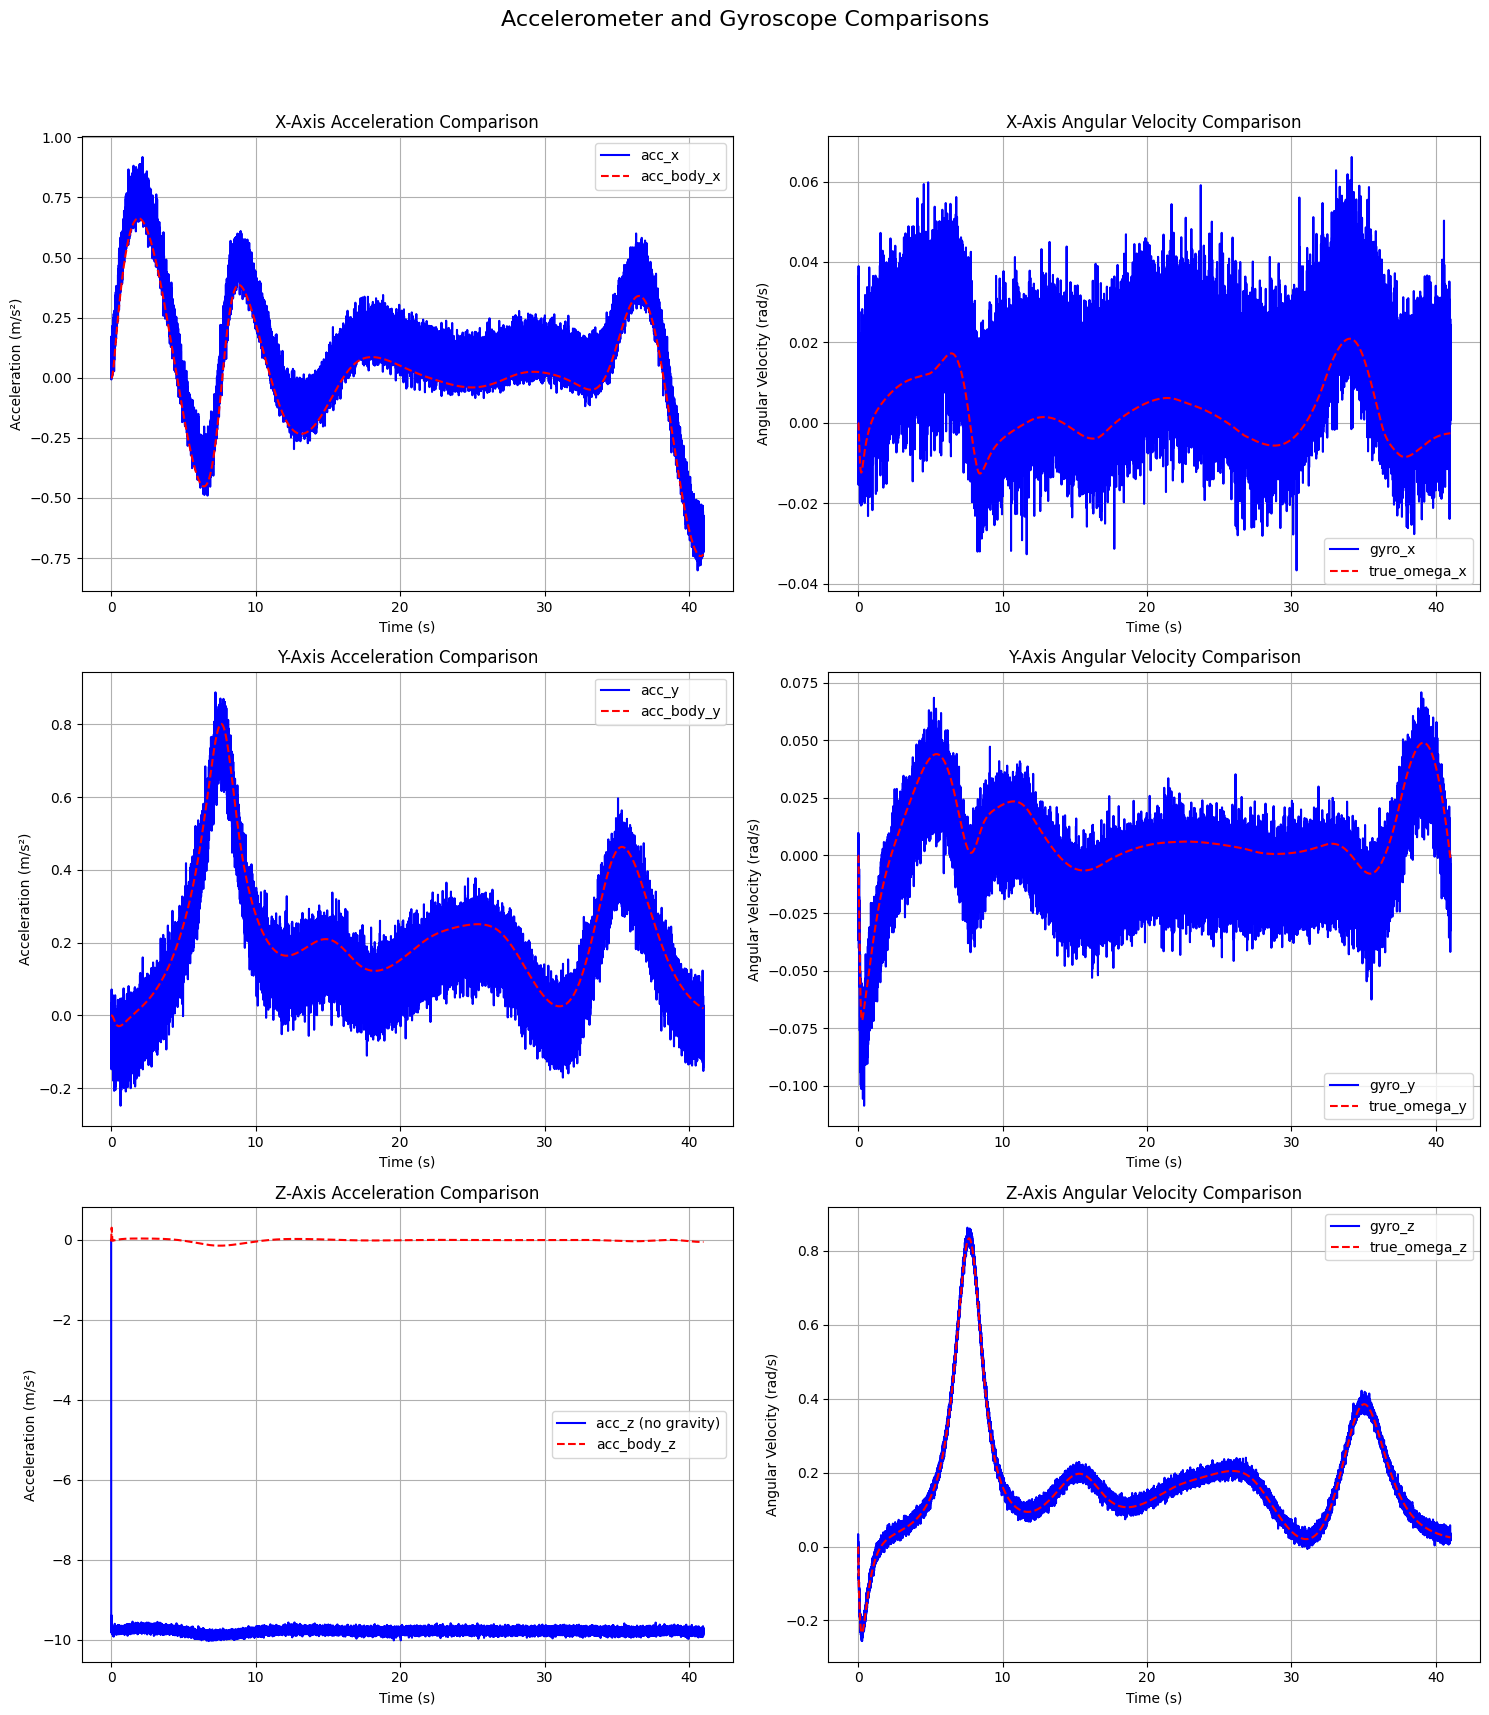

Generating individual sensor plots...


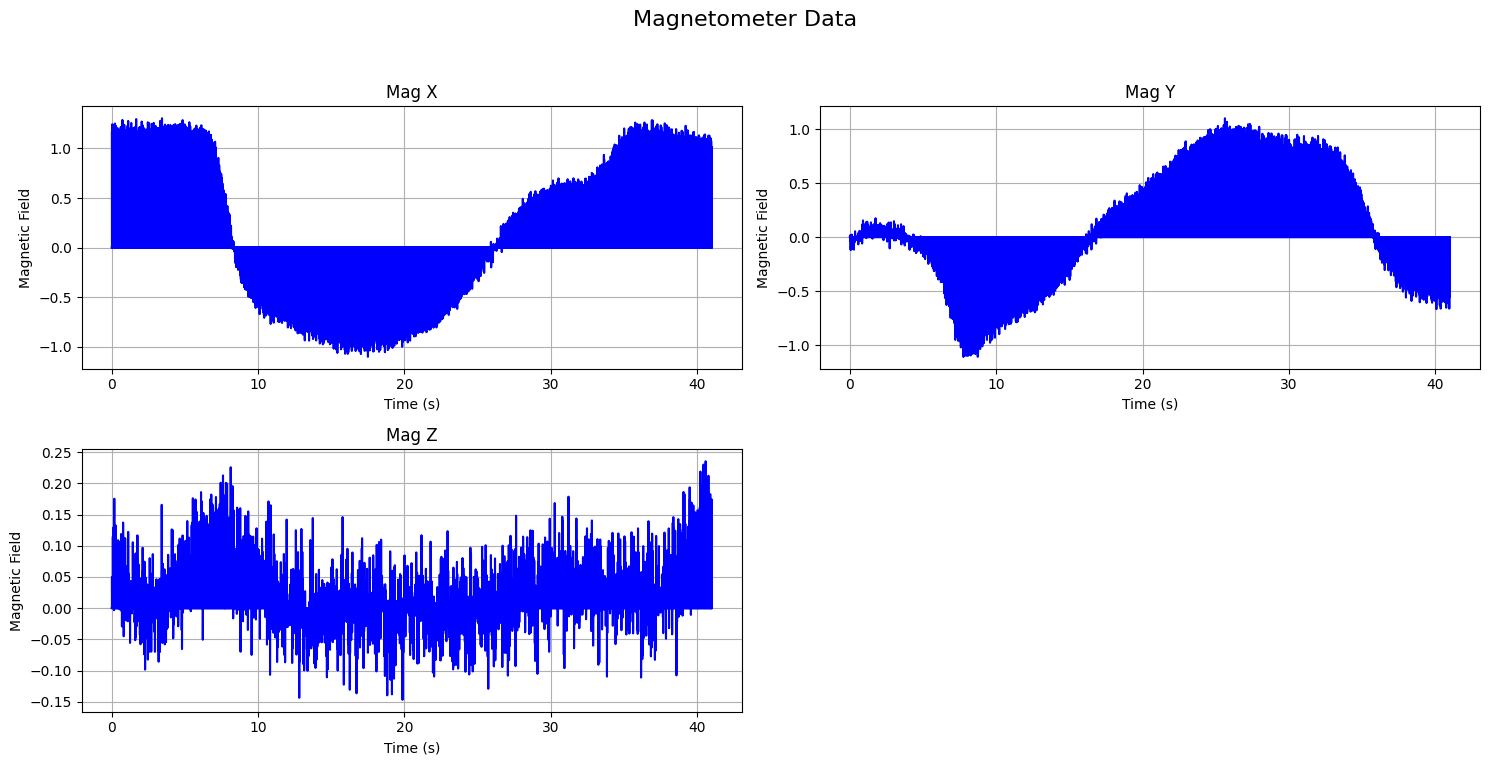

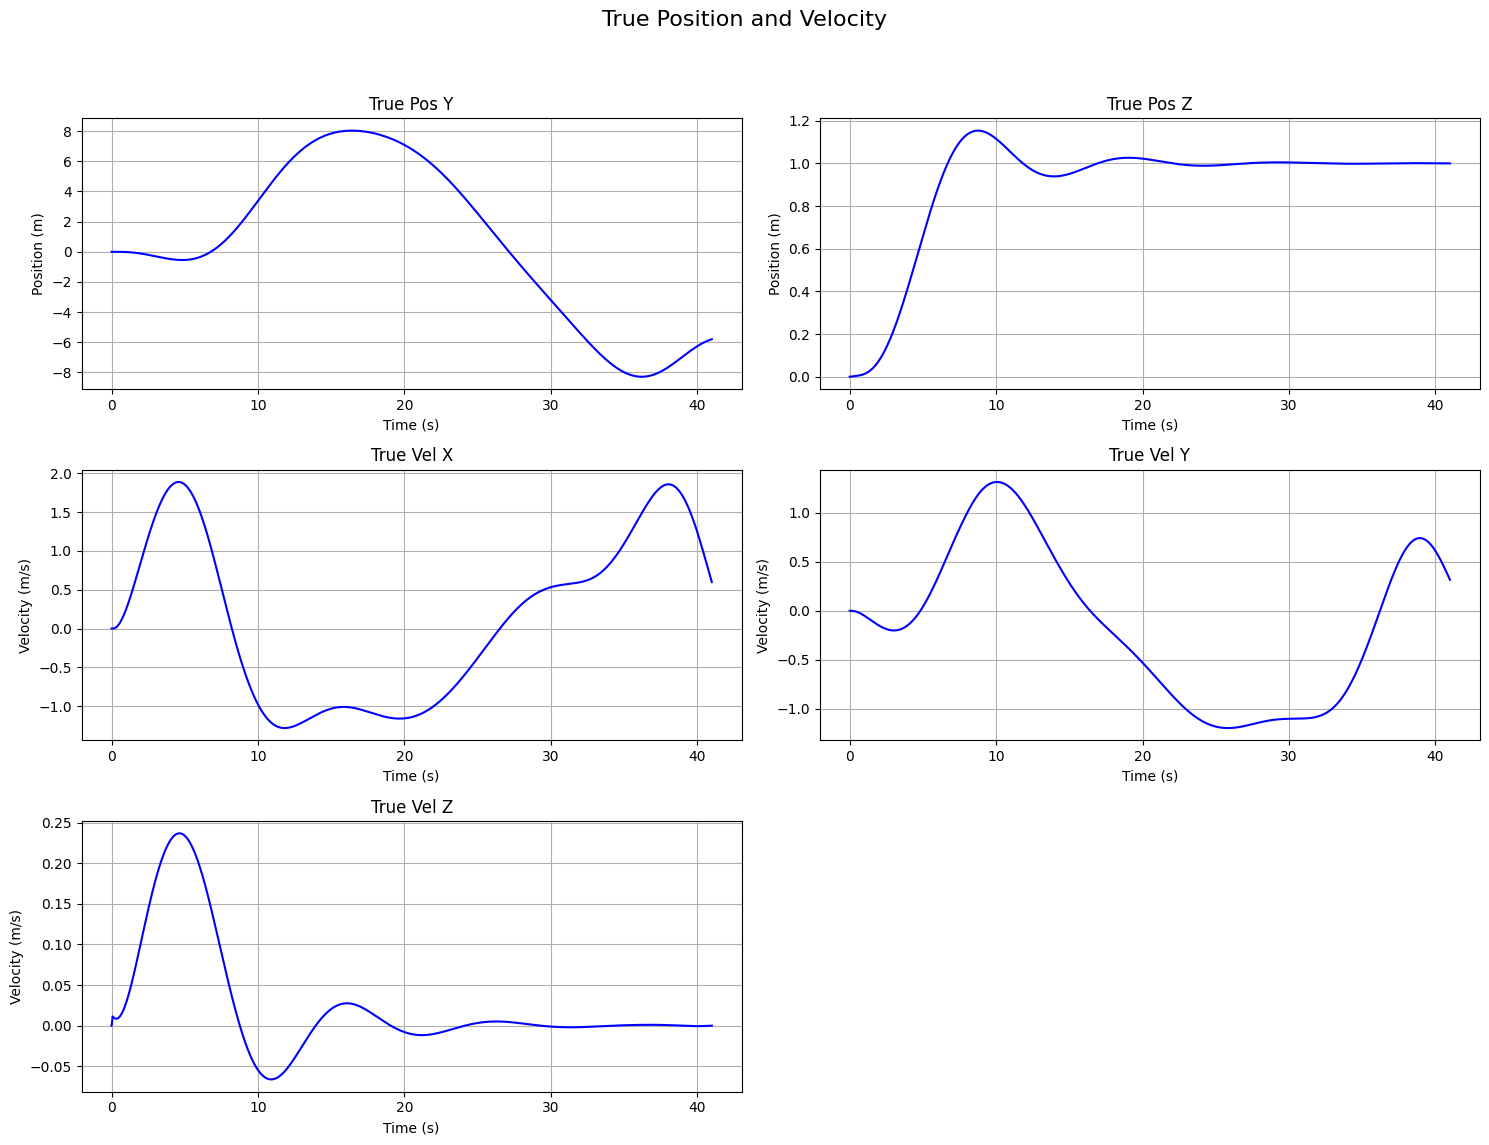

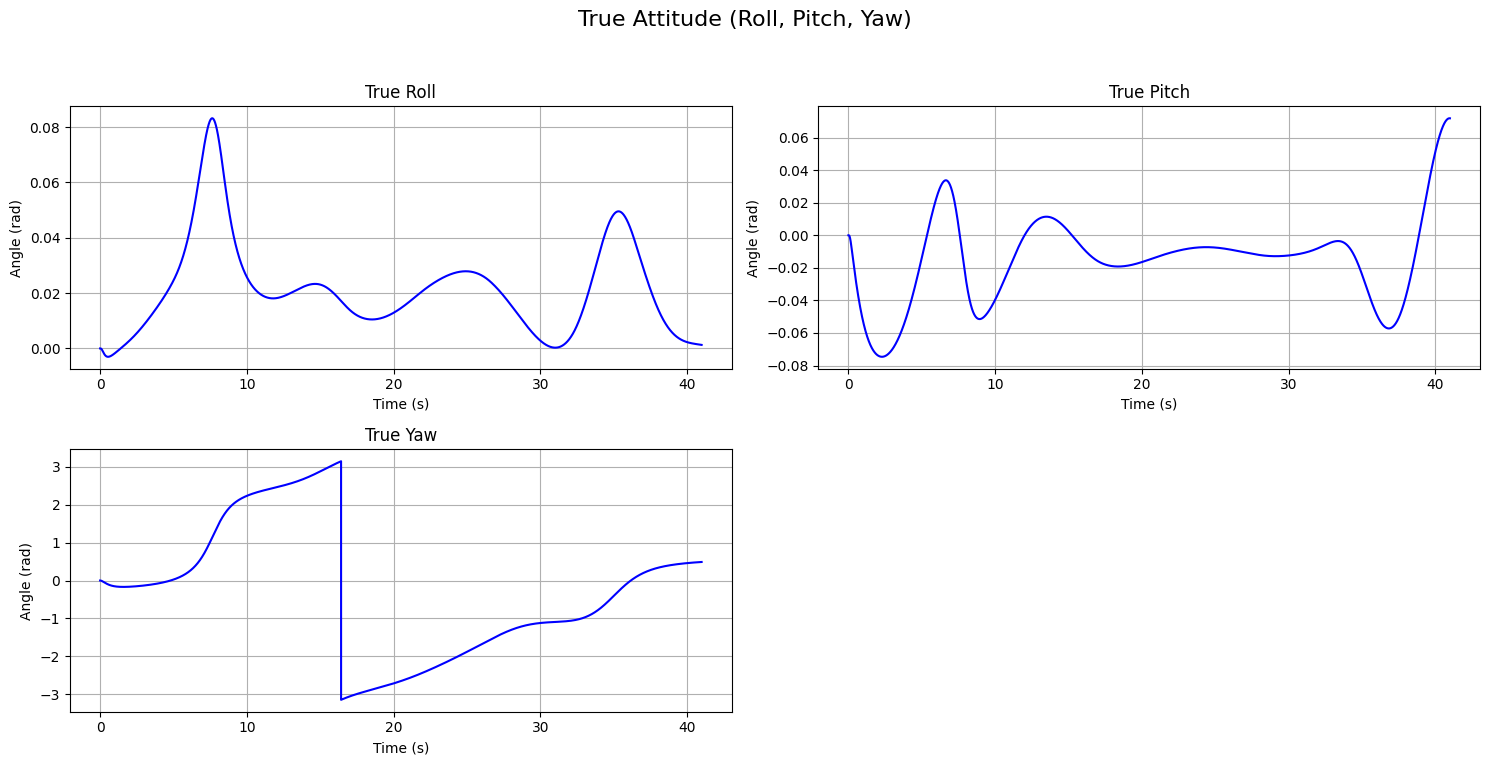


✅ Analysis complete! Generated plots for hexacopter sensor data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


def find_csv_files(data_path):
    """Find all CSV files in the specified directory"""
    csv_files = glob.glob(os.path.join(data_path, "*.csv"))
    return csv_files


def display_available_files(csv_files):
    """Display available CSV files with index numbers"""
    print("\n📁 Available CSV Files:")
    print("-" * 50)
    for i, file in enumerate(csv_files):
        file_size = os.path.getsize(file) / 1024  # KB
        print(f"{i+1:2d}. {os.path.basename(file):30s} ({file_size:.1f} KB)")
    print("-" * 50)

# Add this before plotting to calculate gravity automatically


def estimate_gravity(df, stable_period_start=0, stable_period_end=None):
    """Estimate gravity from a stable period in the data"""
    if stable_period_end is None:
        # Use first 10% of the data or first second, whichever is shorter
        stable_period_end = min(len(df) * 0.1,
                                df[df['timestamp'] <= 1.0].index.max())

    stable_data = df.iloc[stable_period_start:stable_period_end]
    estimated_gravity = stable_data['acc_z'].mean()
    return estimated_gravity


def plot_sensor_comparison(df, title="Sensor Data Comparison", gravity=9.81):
    """
    Plot comparison between sensor data in different reference frames
    Removes gravity from z-axis acceleration for clearer visualization

    Parameters:
    df (DataFrame): Data frame containing sensor readings
    title (str): Plot title
    gravity (float): Gravity value to remove from z-axis (default 9.81 m/s²)
    """

    fig = plt.figure(figsize=(15, 18))
    plt.suptitle(title, fontsize=16)

    # Create comparison plots for accelerometer data
    # ---------------------------------------------
    ax1 = plt.subplot(3, 2, 1)
    ax1.plot(df['timestamp'], df['acc_x'], 'b-', label='acc_x')
    ax1.plot(df['timestamp'], df['acc_body_x'], 'r--', label='acc_body_x')
    ax1.set_title('X-Axis Acceleration Comparison')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Acceleration (m/s²)')
    ax1.grid(True)
    ax1.legend()

    ax2 = plt.subplot(3, 2, 3)
    ax2.plot(df['timestamp'], df['acc_y'], 'b-', label='acc_y')
    ax2.plot(df['timestamp'], df['acc_body_y'], 'r--', label='acc_body_y')
    ax2.set_title('Y-Axis Acceleration Comparison')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Acceleration (m/s²)')
    ax2.grid(True)
    ax2.legend()

    # For z-axis, ONLY remove gravity from acc_z, not acc_body_z
    ax3 = plt.subplot(3, 2, 5)
    # Create a copy to avoid modifying the original data
    acc_z_no_gravity = df['acc_z']

    ax3.plot(df['timestamp'], acc_z_no_gravity,
             'b-', label='acc_z (no gravity)')
    ax3.plot(df['timestamp'], df['acc_body_z'], 'r--', label='acc_body_z')
    ax3.set_title('Z-Axis Acceleration Comparison')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Acceleration (m/s²)')
    ax3.grid(True)
    ax3.legend()

    # Create comparison plots for gyro data
    # ---------------------------------------------
    ax4 = plt.subplot(3, 2, 2)
    ax4.plot(df['timestamp'], df['gyro_x'], 'b-', label='gyro_x')
    ax4.plot(df['timestamp'], df['true_omega_x'], 'r--', label='true_omega_x')
    ax4.set_title('X-Axis Angular Velocity Comparison')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Angular Velocity (rad/s)')
    ax4.grid(True)
    ax4.legend()

    ax5 = plt.subplot(3, 2, 4)
    ax5.plot(df['timestamp'], df['gyro_y'], 'b-', label='gyro_y')
    ax5.plot(df['timestamp'], df['true_omega_y'], 'r--', label='true_omega_y')
    ax5.set_title('Y-Axis Angular Velocity Comparison')
    ax5.set_xlabel('Time (s)')
    ax5.set_ylabel('Angular Velocity (rad/s)')
    ax5.grid(True)
    ax5.legend()

    ax6 = plt.subplot(3, 2, 6)
    ax6.plot(df['timestamp'], df['gyro_z'], 'b-', label='gyro_z')
    ax6.plot(df['timestamp'], df['true_omega_z'], 'r--', label='true_omega_z')
    ax6.set_title('Z-Axis Angular Velocity Comparison')
    ax6.set_xlabel('Time (s)')
    ax6.set_ylabel('Angular Velocity (rad/s)')
    ax6.grid(True)
    ax6.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def plot_sensor_data(df, sensors, title="Sensor Data"):
    """Plot multiple sensor readings in subplots"""

    n_sensors = len(sensors)
    n_cols = 2
    n_rows = (n_sensors + n_cols - 1) // n_cols

    fig = plt.figure(figsize=(15, n_rows * 4))
    plt.suptitle(title, fontsize=16)

    for i, sensor in enumerate(sensors):
        ax = plt.subplot(n_rows, n_cols, i+1)
        ax.plot(df['timestamp'], df[sensor], 'b-')
        ax.set_title(sensor.replace('_', ' ').title())
        ax.set_xlabel('Time (s)')

        # Add appropriate y-axis labels based on sensor type
        if 'acc' in sensor:
            ax.set_ylabel('Acceleration (m/s²)')
        elif 'gyro' in sensor or 'omega' in sensor:
            ax.set_ylabel('Angular Velocity (rad/s)')
        elif 'mag' in sensor:
            ax.set_ylabel('Magnetic Field')
        elif 'pos' in sensor:
            ax.set_ylabel('Position (m)')
        elif 'vel' in sensor:
            ax.set_ylabel('Velocity (m/s)')
        elif 'roll' in sensor or 'pitch' in sensor or 'yaw' in sensor:
            ax.set_ylabel('Angle (rad)')
        else:
            ax.set_ylabel('Value')

        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def main():
    """Main function to run the hexacopter data analysis"""
    print("="*80)
    print("🚁 HEXACOPTER SENSOR DATA VISUALIZATION AND COMPARISON")
    print("="*80)

    # Set default data path
    default_path = r"D:\Kuliah\semester 8\TA\koding\copter\simulasi\Quadcopter_SimCon\Simulation\logs"

    print(f"\n📂 Default data path: {default_path}")
    custom_path = input(
        "Enter custom path (or press Enter to use default): ").strip()

    data_path = custom_path if custom_path else default_path

    # Find CSV files
    csv_files = find_csv_files(data_path)

    if not csv_files:
        print(f"❌ No CSV files found in: {data_path}")
        return

    # Display available files
    display_available_files(csv_files)

    # File selection
    while True:
        try:
            file_choice = input(
                f"\nSelect file number (1-{len(csv_files)}): ").strip()
            file_index = int(file_choice) - 1
            if 0 <= file_index < len(csv_files):
                selected_file = csv_files[file_index]
                break
            else:
                print(
                    f"❌ Please enter a number between 1 and {len(csv_files)}")
        except ValueError:
            print("❌ Please enter a valid number")

    # Load data
    print(f"\n📖 Loading data from: {os.path.basename(selected_file)}")
    try:
        df = pd.read_csv(selected_file)
        print(f"✅ Data loaded successfully!")
        print(f"   Shape: {df.shape}")
        print(
            f"   Time range: {df['timestamp'].min():.2f} - {df['timestamp'].max():.2f} seconds")
        print(
            f"   Duration: {df['timestamp'].max() - df['timestamp'].min():.2f} seconds")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return

    # Define sensor groups to plot
    acc_sensors = ['acc_x', 'acc_y', 'acc_z']
    gyro_sensors = ['gyro_x', 'gyro_y', 'gyro_z']
    mag_sensors = ['mag_x', 'mag_y', 'mag_z']
    acc_body_sensors = ['acc_body_x', 'acc_body_y', 'acc_body_z']
    true_pos_vel_sensors = ['true_pos_y', 'true_pos_z',
                            'true_vel_x', 'true_vel_y', 'true_vel_z']
    true_attitude_sensors = ['true_roll', 'true_pitch', 'true_yaw']
    true_omega_sensors = ['true_omega_x', 'true_omega_y', 'true_omega_z']

    # Plot sensor data
    print("\n📊 Plotting sensor data...")

    # First, plot the comparison between accelerometer data in different frames
    print("Generating accelerometer and gyroscope comparisons...")
    gravity = estimate_gravity(df)
    print(f"Estimated gravity: {gravity:.2f} m/s²")
    plot_sensor_comparison(df, title="Accelerometer and Gyroscope Comparisons",
                           gravity=gravity)

    # Then plot all other requested sensor data
    print("Generating individual sensor plots...")

    # Plot mag
    # netometer data
    plot_sensor_data(df, mag_sensors, title="Magnetometer Data")

    # Plot position and velocity data
    plot_sensor_data(df, true_pos_vel_sensors,
                     title="True Position and Velocity")

    # Plot attitude data
    plot_sensor_data(df, true_attitude_sensors,
                     title="True Attitude (Roll, Pitch, Yaw)")

    print("\n✅ Analysis complete! Generated plots for hexacopter sensor data.")


# Run the main function
if __name__ == "__main__":
    main()

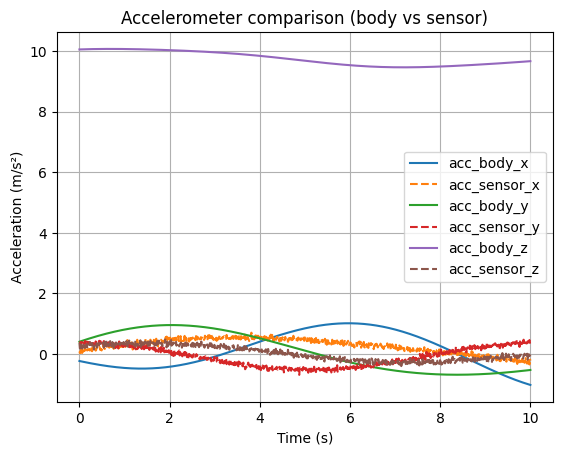

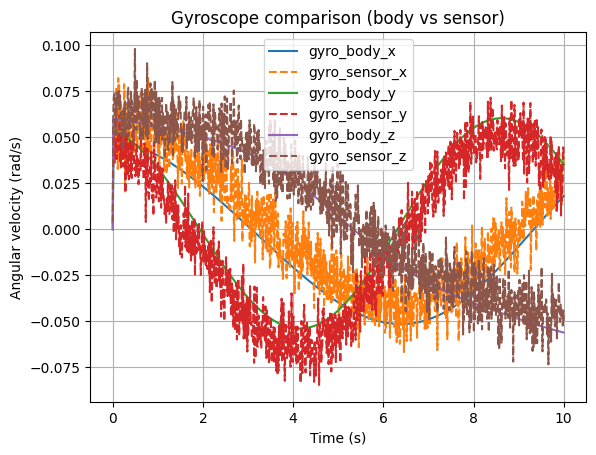

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- IMU Sensor Class (copied verbatim) ---------------- #


class IMUSensor:
    def __init__(self):
        # Noise parameters (standard deviation)
        self.acc_noise_std = 0.05  # m/s^2
        self.gyro_noise_std = 0.01  # rad/s

        # Bias parameters
        self.acc_bias = np.array([0.1, -0.05, 0.03])  # Initial bias (m/s^2)
        self.gyro_bias = np.array([0.01, -0.01, 0.005])  # Initial bias (rad/s)

        # Parameters for random walk bias model
        self.acc_bias_walk = 0.0001  # m/s^2 per √s
        self.gyro_bias_walk = 0.0001  # rad/s per √s

        # Sampling frequency
        self.freq = 100  # Hz
        self.dt = 1.0 / self.freq

    def measure(self, quad):
        # Acceleration in inertial frame (includes gravity)
        acc_inertial = quad.acc

        # Convert acceleration to body frame
        R = quad.dcm  # body→inertial
        acc_body_without_gravity = R.T @ acc_inertial

        # Gravity vector in NED
        gravity_ned = np.array([0, 0, 9.81])
        gravity_body = R.T @ gravity_ned

        # Specific force (what an accelerometer senses)
        acc_true = acc_body_without_gravity - gravity_body

        # Gyroscope true reading (angular velocity in body frame)
        omega_true = quad.omega

        # Add noise
        acc_noise = np.random.normal(0, self.acc_noise_std, 3)
        gyro_noise = np.random.normal(0, self.gyro_noise_std, 3)

        # Random‑walk bias update
        self.acc_bias += np.random.normal(0,
                                          self.acc_bias_walk * np.sqrt(self.dt), 3)
        self.gyro_bias += np.random.normal(0,
                                           self.gyro_bias_walk * np.sqrt(self.dt), 3)

        # Final sensor outputs
        acc_measured = acc_true + self.acc_bias + acc_noise
        gyro_measured = omega_true + self.gyro_bias + gyro_noise

        return acc_measured, gyro_measured

# ---------------- Utility: Euler→DCM ---------------- #


def dcm_from_euler(roll, pitch, yaw):
    cr, sr = np.cos(roll), np.sin(roll)
    cp, sp = np.cos(pitch), np.sin(pitch)
    cy, sy = np.cos(yaw), np.sin(yaw)

    R_z = np.array([[cy, -sy, 0],
                    [sy,  cy, 0],
                    [0,   0, 1]])
    R_y = np.array([[cp, 0, sp],
                    [0, 1,  0],
                    [-sp, 0, cp]])
    R_x = np.array([[1, 0,  0],
                    [0, cr, -sr],
                    [0, sr,  cr]])

    return R_z @ R_y @ R_x  # body→inertial

# ---------------- Dummy quadcopter object ---------------- #


class DummyQuad:
    pass


# ---------------- Simulation parameters ---------------- #
dt = 0.01              # 100 Hz
T_total = 10.0         # seconds
N = int(T_total / dt)

t_arr = np.linspace(0, T_total, N)

# Pre‑allocate storage
acc_body_store = np.zeros((N, 3))
gyro_body_store = np.zeros((N, 3))
acc_sens_store = np.zeros((N, 3))
gyro_sens_store = np.zeros((N, 3))
specf_true_store = np.zeros((N, 3))


imu = IMUSensor()

# Generate smooth (sinusoidal) motion profile for roll/pitch/yaw & acceleration
roll_traj = 0.1 * np.sin(0.5 * t_arr)          # ±0.1 rad ≈ 5.7°
pitch_traj = 0.08 * np.sin(0.7 * t_arr + 0.3)
yaw_traj = 0.2 * np.sin(0.3 * t_arr)

# Simple translational accelerations in inertial frame (m/s²)
acc_inertial_trans = np.vstack([
    0.5 * np.sin(0.4 * t_arr),
    0.4 * np.cos(0.6 * t_arr),
    0.3 * np.sin(0.5 * t_arr + 1.0)
]).T

# Add gravity (NED, down is +)
gravity_ned = np.array([0, 0, 9.81])

# Main simulation loop
roll_prev, pitch_prev, yaw_prev = roll_traj[0], pitch_traj[0], yaw_traj[0]

for k, t in enumerate(t_arr):
    # Orientation
    roll = roll_traj[k]
    pitch = pitch_traj[k]
    yaw = yaw_traj[k]

    # Euler angle derivatives (finite difference)
    if k == 0:
        droll, dpitch, dyaw = 0, 0, 0
    else:
        droll = (roll - roll_prev) / dt
        dpitch = (pitch - pitch_prev) / dt
        dyaw = (yaw - yaw_prev) / dt

    # Body angular velocity from Euler rates (ZYX)
    omega_x = droll - dyaw * np.sin(pitch)
    omega_y = dpitch * np.cos(roll) + dyaw * np.sin(roll) * np.cos(pitch)
    omega_z = dyaw * np.cos(roll) * np.cos(pitch) - dpitch * np.sin(roll)

    omega_body = np.array([omega_x, omega_y, omega_z])

    # Store previous angles
    roll_prev, pitch_prev, yaw_prev = roll, pitch, yaw

    # Rotation matrix
    R = dcm_from_euler(roll, pitch, yaw)

    acc_inertial = acc_inertial_trans[k] + gravity_ned
    g_body = R.T @ np.array([0, 0, 9.81])          # gravitasi di kerangka bodi
    specf_true = (R.T @ acc_inertial) - g_body     # = a_body − g_body
    specf_true_store[k] = specf_true

    # Acceleration in inertial frame (add gravity)

    # Create quad object with required attributes
    quad = DummyQuad()
    quad.acc = acc_inertial
    quad.omega = omega_body
    quad.dcm = R

    # Sensor measurement
    acc_meas, gyro_meas = imu.measure(quad)

    # Save logs
    acc_body_store[k] = R.T @ acc_inertial   # body-frame accel (with g)
    gyro_body_store[k] = omega_body
    acc_sens_store[k] = acc_meas
    gyro_sens_store[k] = gyro_meas

# ---------------- Plot: Accelerometer ---------------- #
plt.figure()
plt.plot(t_arr, acc_body_store[:, 0], label="acc_body_x")
plt.plot(t_arr, acc_sens_store[:, 0], label="acc_sensor_x", linestyle="--")
plt.plot(t_arr, acc_body_store[:, 1], label="acc_body_y")
plt.plot(t_arr, acc_sens_store[:, 1], label="acc_sensor_y", linestyle="--")
plt.plot(t_arr, acc_body_store[:, 2], label="acc_body_z")
plt.plot(t_arr, acc_sens_store[:, 2], label="acc_sensor_z", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Accelerometer comparison (body vs sensor)")
plt.legend()
plt.grid(True)

# ---------------- Plot: Gyroscope ---------------- #
plt.figure()
plt.plot(t_arr, gyro_body_store[:, 0], label="gyro_body_x")
plt.plot(t_arr, gyro_sens_store[:, 0], label="gyro_sensor_x", linestyle="--")
plt.plot(t_arr, gyro_body_store[:, 1], label="gyro_body_y")
plt.plot(t_arr, gyro_sens_store[:, 1], label="gyro_sensor_y", linestyle="--")
plt.plot(t_arr, gyro_body_store[:, 2], label="gyro_body_z")
plt.plot(t_arr, gyro_sens_store[:, 2], label="gyro_sensor_z", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Angular velocity (rad/s)")
plt.title("Gyroscope comparison (body vs sensor)")
plt.legend()
plt.grid(True)

plt.show()